In [1]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.manifold import Isomap,TSNE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
df_train.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [4]:
df_test.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,PID0x4175,6,No,Yes,No,No,4.981655,Charles,NaN,Kore,...,-99,2,Multiple,-99.000000,slightly abnormal,True,True,True,True,True
1,PID0x21f5,10,Yes,No,NaN,Yes,5.118890,Catherine,NaN,Homero,...,Yes,-99,Multiple,8.179584,normal,False,False,False,True,False
2,PID0x49b8,5,No,NaN,No,No,4.876204,James,NaN,Danield,...,No,0,Singular,-99.000000,slightly abnormal,False,False,True,True,False
3,PID0x2d97,13,No,Yes,Yes,No,4.687767,Brian,NaN,Orville,...,Yes,-99,Singular,6.884071,normal,True,False,True,False,True
4,PID0x58da,5,No,NaN,NaN,Yes,5.152362,Gary,NaN,Issiah,...,No,-99,Multiple,6.195178,normal,True,True,True,True,False


In [5]:
df_train.shape

(22083, 45)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

In [7]:
df_train.isna().sum()

Patient Id                                             0
Patient Age                                         1427
Genes in mother's side                                 0
Inherited from father                                306
Maternal gene                                       2810
Paternal gene                                          0
Blood cell count (mcL)                                 0
Patient First Name                                     0
Family Name                                         9691
Father's name                                          0
Mother's age                                        6036
Father's age                                        5986
Institute Name                                      5106
Location of Institute                                  0
Status                                                 0
Respiratory Rate (breaths/min)                      2149
Heart Rate (rates/min                               2113
Test 1                         

In [8]:
print(df_train.isnull().sum())
print("----------------------------------------------------")
print(df_test.isnull().sum())

Patient Id                                             0
Patient Age                                         1427
Genes in mother's side                                 0
Inherited from father                                306
Maternal gene                                       2810
Paternal gene                                          0
Blood cell count (mcL)                                 0
Patient First Name                                     0
Family Name                                         9691
Father's name                                          0
Mother's age                                        6036
Father's age                                        5986
Institute Name                                      5106
Location of Institute                                  0
Status                                                 0
Respiratory Rate (breaths/min)                      2149
Heart Rate (rates/min                               2113
Test 1                         

In [9]:
df_train.columns

Index(['Patient Id', 'Patient Age', 'Genes in mother's side',
       'Inherited from father', 'Maternal gene', 'Paternal gene',
       'Blood cell count (mcL)', 'Patient First Name', 'Family Name',
       'Father's name', 'Mother's age', 'Father's age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'S

In [10]:
df_train.describe()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,Test 4,Test 5,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
count,20656.000000,22083.000000,16047.000000,16097.000000,19956.0,19931.0,19936.0,19943.0,19913.0,19921.000000,19935.000000,19928.000000,19861.000000,19982.000000,19970.000000,19930.000000
mean,6.974148,4.898871,34.526454,41.972852,0.0,0.0,0.0,1.0,0.0,2.003062,7.486224,0.592483,0.551886,0.536233,0.497747,0.461917
std,4.319475,0.199663,9.852598,13.035501,0.0,0.0,0.0,0.0,0.0,1.411919,2.653393,0.491385,0.497313,0.498698,0.500007,0.498560
min,0.000000,4.092727,18.000000,20.000000,0.0,0.0,0.0,1.0,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.763109,26.000000,31.000000,0.0,0.0,0.0,1.0,0.0,1.000000,5.424703,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,4.899399,35.000000,42.000000,0.0,0.0,0.0,1.0,0.0,2.000000,7.477132,1.000000,1.000000,1.000000,0.000000,0.000000
75%,11.000000,5.033830,43.000000,53.000000,0.0,0.0,0.0,1.0,0.0,3.000000,9.526152,1.000000,1.000000,1.000000,1.000000,1.000000
max,14.000000,5.609829,51.000000,64.000000,0.0,0.0,0.0,1.0,0.0,4.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df_train.drop("Patient Id",axis=1,inplace=True)
df_train.drop("Family Name",axis=1,inplace=True)
df_train.drop("Patient First Name",axis=1,inplace=True)
df_train.drop("Father's name",axis=1,inplace=True)
df_train.drop("Institute Name",axis=1,inplace=True)
df_train.drop("Location of Institute",axis=1,inplace=True)
df_train.drop("Place of birth",axis=1,inplace=True)
df_train.drop("Parental consent",axis=1,inplace=True)
df_train.drop("Follow-up",axis=1,inplace=True)

df_test.drop("Patient Id",axis=1,inplace=True)
df_test.drop("Family Name",axis=1,inplace=True)
df_test.drop("Patient First Name",axis=1,inplace=True)
df_test.drop("Father's name",axis=1,inplace=True)
df_test.drop("Institute Name",axis=1,inplace=True)
df_test.drop("Location of Institute",axis=1,inplace=True)
df_test.drop("Place of birth",axis=1,inplace=True)
df_test.drop("Parental consent",axis=1,inplace=True)
df_test.drop("Follow-up",axis=1,inplace=True)

In [12]:
df_train.isna().sum()

Patient Age                                         1427
Genes in mother's side                                 0
Inherited from father                                306
Maternal gene                                       2810
Paternal gene                                          0
Blood cell count (mcL)                                 0
Mother's age                                        6036
Father's age                                        5986
Status                                                 0
Respiratory Rate (breaths/min)                      2149
Heart Rate (rates/min                               2113
Test 1                                              2127
Test 2                                              2152
Test 3                                              2147
Test 4                                              2140
Test 5                                              2170
Gender                                              2173
Birth asphyxia                 

In [13]:
catecols=["Genes in mother's side", "Inherited from father", 'Maternal gene',
       'Paternal gene', 'Status','Gender',
       'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min','Birth asphyxia',
       'Autopsy shows birth defect (if applicable)','Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)', 'H/O substance abuse',
       'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies','Birth defects', 'Blood test result']

x=df_train.groupby('Genetic Disorder')['Disorder Subclass'].apply(set)
y=dict(x)
df_train = df_train[df_train['Disorder Subclass'].notna()]

d={}
for i in range(len(x)):
  x[i]=list(x[i])
  for j in x[i]:
    d[j]=x.index[i]

disorder=d

import math
df_train['Genetic Disorder'] = df_train.apply(
    lambda row: disorder[row['Disorder Subclass']] if pd.isna(row['Genetic Disorder']) else row['Genetic Disorder'],
    axis=1
)

f = lambda x: x.mean() if np.issubdtype(x.dtype, np.number) else x.mode().iloc[0]
df_train = df_train.fillna(df_train.groupby(['Disorder Subclass']).transform(f))

#Deep copy the train dataset into another dataframe
dfg=df_train.copy(deep=True)

df_train

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,Yes,No,Yes,No,4.760603,34.978814,42.159184,Alive,Normal (30-60),...,Multiple,9.857562,slightly abnormal,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,4.0,Yes,Yes,No,No,4.910669,34.661983,23.0,Deceased,Tachypnea,...,Multiple,5.52256,normal,1.0,0.701726,1.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,Singular,7.472702,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,Yes,No,Yes,No,4.705280,21.0,41.689446,Deceased,Tachypnea,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,Yes,No,No,Yes,4.720703,32.0,40.971429,Alive,Tachypnea,...,Multiple,4.09821,abnormal,0.0,0.0,0.0,0.0,0.011494,Multifactorial genetic inheritance disorders,Cancer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22078,4.0,Yes,Yes,Yes,No,5.258298,35.0,64.0,Deceased,Normal (30-60),...,Multiple,6.584811,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
22079,8.0,No,Yes,No,Yes,4.974220,34.684094,56.0,Alive,Normal (30-60),...,Multiple,7.041556,inconclusive,1.0,1.0,1.0,1.0,0.0,Multifactorial genetic inheritance disorders,Diabetes
22080,8.0,Yes,No,Yes,No,5.186470,35.0,51.0,Deceased,Tachypnea,...,Singular,7.715464,normal,0.0,0.0,0.0,1.0,0.321241,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
22081,7.0,Yes,No,Yes,Yes,4.858543,19.0,41.689446,Alive,Tachypnea,...,Multiple,8.43767,abnormal,1.0,1.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome


In [14]:
for i in df_train.columns:
    print(i,df_train[i].unique())

Patient Age [2.0 4.0 6.0 12.0 11.0 14.0 3.0 7.0 1.0 0.0 np.float64(6.950728230554695)
 10.0 np.float64(6.936245083833575) 5.0 np.float64(7.095345345345345) 8.0
 9.0 13.0 np.float64(6.871749408983452) np.float64(6.784539473684211)
 np.float64(6.9524384355383875) np.float64(6.875394321766562)
 np.float64(6.554054054054054) np.float64(7.413043478260869)]
Genes in mother's side ['Yes' 'No']
Inherited from father ['No' 'Yes']
Maternal gene ['Yes' 'No']
Paternal gene ['No' 'Yes']
Blood cell count (mcL) [4.76060309 4.91066906 4.89329743 ... 5.1864702  4.85854267 4.73806671]
Mother's age [np.float64(34.978813559322035) np.float64(34.66198282591725) 41.0 21.0
 32.0 np.float64(34.469839773798306) 40.0 45.0 44.0
 np.float64(34.495486459378135) 50.0 28.0 30.0 24.0 36.0
 np.float64(34.453417788334654) np.float64(34.47402597402598) 51.0 23.0
 49.0 46.0 18.0 38.0 37.0 42.0 48.0 25.0 19.0 47.0 34.0 35.0 22.0 33.0
 20.0 26.0 29.0 31.0 27.0 43.0 39.0 np.float64(34.55263157894737)
 np.float64(35.29357798

In [15]:
df_test=df_test.replace(' ',None)
testf= {'Patient Age': 4.0, "Genes in mother's side": 'Yes', 'Inherited from father': 'No', 'Maternal gene': 'Yes', 'Paternal gene': 'No', 'Blood cell count (mcL)': 4.898916949522597, "Mother's age": '23.0', "Father's age": '20.0', 'Respiratory Rate (breaths/min)': 'Normal (30-60)', 'Heart Rate (rates/min': 'Normal', 'Test 1': 0.0, 'Test 2': 0.0, 'Test 3': 0.0, 'Test 4': 1.0, 'Test 5': 0.0, 'Parental consent': 'Yes', 'Follow-up': 'Low', 'Gender': 'Ambiguous', 'Birth asphyxia': 'Yes', 'Autopsy shows birth defect (if applicable)': 'Not applicable', 'Folic acid details (peri-conceptional)': 'Yes', 'H/O serious maternal illness': 'No', 'H/O radiation exposure (x-ray)': 'Not applicable', 'H/O substance abuse': '-', 'Assisted conception IVF/ART': 'Yes', 'History of anomalies in previous pregnancies': 'Yes', 'No. of previous abortion': 2.0, 'Birth defects': 'Singular', 'White Blood cell count (thousand per microliter)': '7.486223987209439', 'Blood test result': 'slightly abnormal', 'Symptom 1': 1.0, 'Symptom 2': 1.0, 'Symptom 3': 1.0, 'Symptom 4': 0.0, 'Symptom 5': 0.0}
df_test=df_test.fillna(value=testf)

In [16]:
df_test

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,6,No,Yes,No,No,4.981655,38,61,Alive,Tachypnea,...,-99,2,Multiple,-99.000000,slightly abnormal,True,True,True,True,True
1,10,Yes,No,Yes,Yes,5.118890,33,53,Alive,Normal (30-60),...,Yes,-99,Multiple,8.179584,normal,False,False,False,True,False
2,5,No,No,No,No,4.876204,48,60,Deceased,Normal (30-60),...,No,0,Singular,-99.000000,slightly abnormal,False,False,True,True,False
3,13,No,Yes,Yes,No,4.687767,25,55,Alive,-99,...,Yes,-99,Singular,6.884071,normal,True,False,True,False,True
4,5,No,No,Yes,Yes,5.152362,41,38,Deceased,Tachypnea,...,No,-99,Multiple,6.195178,normal,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,9,Yes,Yes,Yes,No,4.878335,28,63,Alive,-99,...,Yes,2,Multiple,7.234960,abnormal,False,True,True,True,False
9461,1,Yes,No,Yes,Yes,4.927151,37,62,Deceased,-99,...,No,-99,Singular,4.859536,abnormal,False,True,False,True,True
9462,2,No,Yes,No,No,4.898352,24,32,Deceased,Tachypnea,...,No,3,-99,5.696062,normal,False,True,False,False,True
9463,13,No,Yes,No,No,4.804840,36,56,Alive,Normal (30-60),...,-99,1,Singular,3.000000,inconclusive,True,True,True,True,True


In [17]:
df_train.isna().sum()

Patient Age                                         0
Genes in mother's side                              0
Inherited from father                               0
Maternal gene                                       0
Paternal gene                                       0
Blood cell count (mcL)                              0
Mother's age                                        0
Father's age                                        0
Status                                              0
Respiratory Rate (breaths/min)                      0
Heart Rate (rates/min                               0
Test 1                                              0
Test 2                                              0
Test 3                                              0
Test 4                                              0
Test 5                                              0
Gender                                              0
Birth asphyxia                                      0
Autopsy shows birth defect (

In [18]:
df_test.isna().sum()

Patient Age                                         0
Genes in mother's side                              0
Inherited from father                               0
Maternal gene                                       0
Paternal gene                                       0
Blood cell count (mcL)                              0
Mother's age                                        0
Father's age                                        0
Status                                              0
Respiratory Rate (breaths/min)                      0
Heart Rate (rates/min                               0
Test 1                                              0
Test 2                                              0
Test 3                                              0
Test 4                                              0
Test 5                                              0
Gender                                              0
Birth asphyxia                                      0
Autopsy shows birth defect (

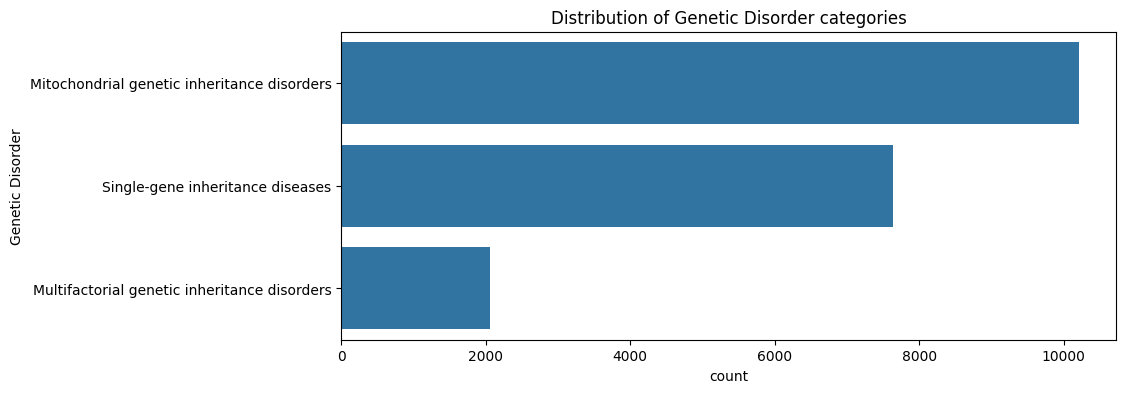

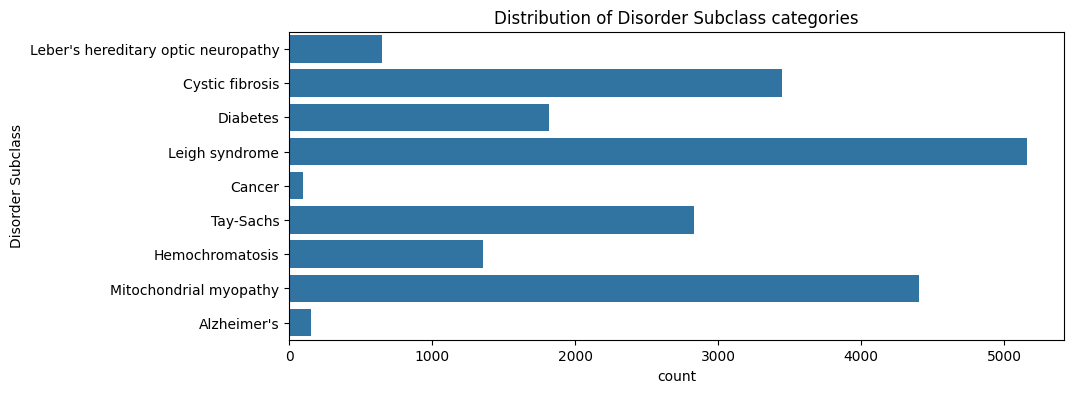

In [19]:
# EDA: Target distributions
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
sns.countplot(y=df_train["Genetic Disorder"])
plt.title("Distribution of Genetic Disorder categories")
plt.show()

plt.figure(figsize=(10,4))
sns.countplot(y=df_train["Disorder Subclass"])
plt.title("Distribution of Disorder Subclass categories")
plt.show()


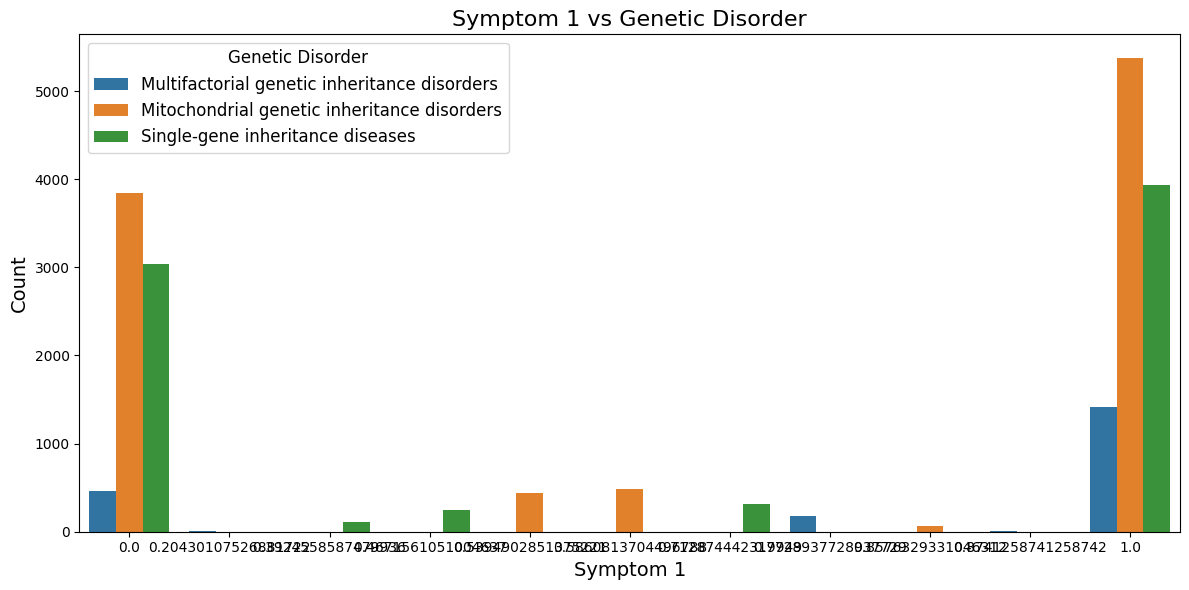

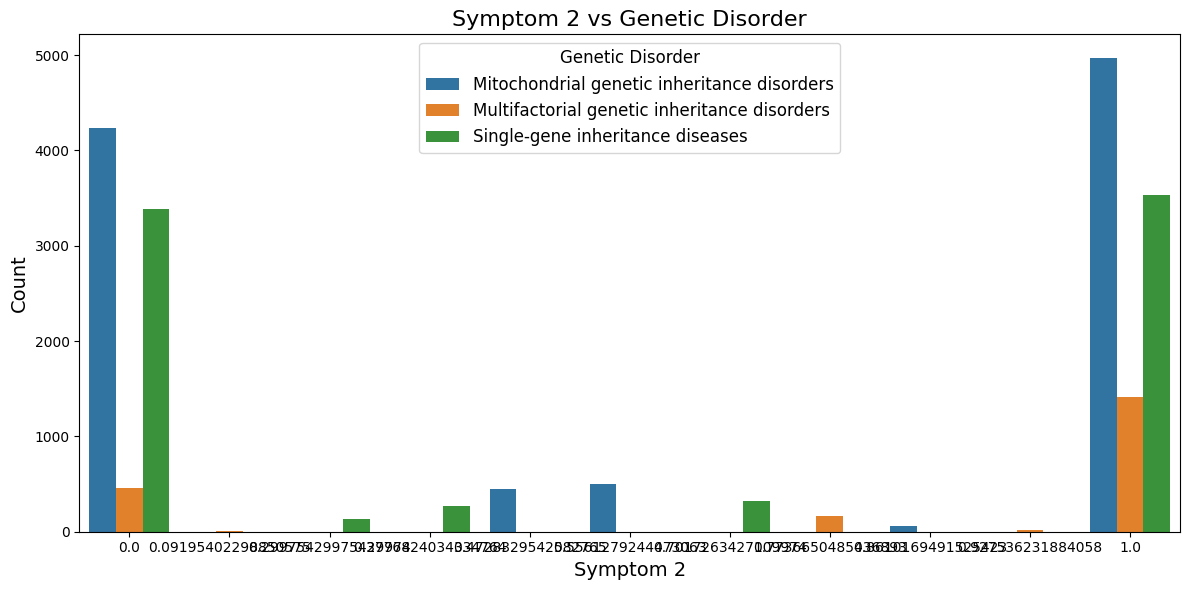

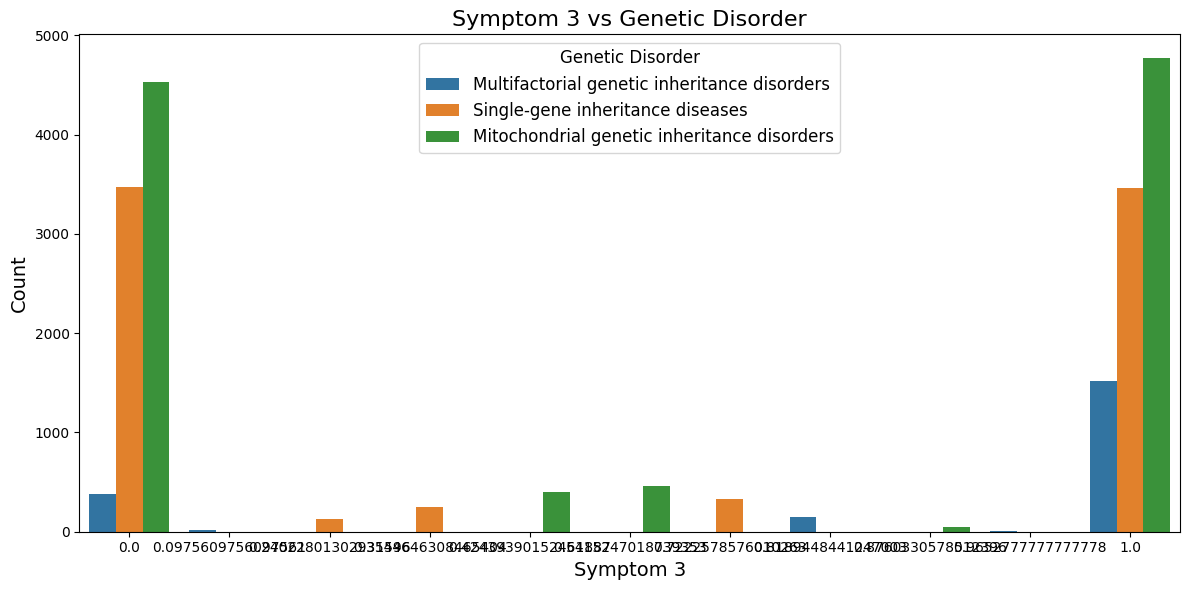

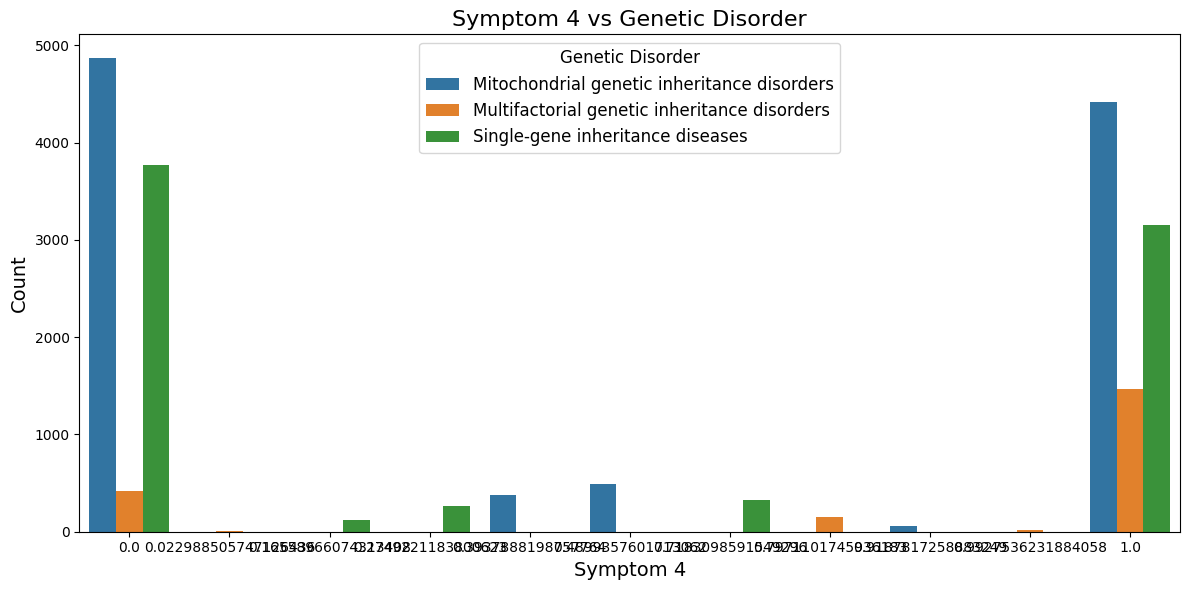

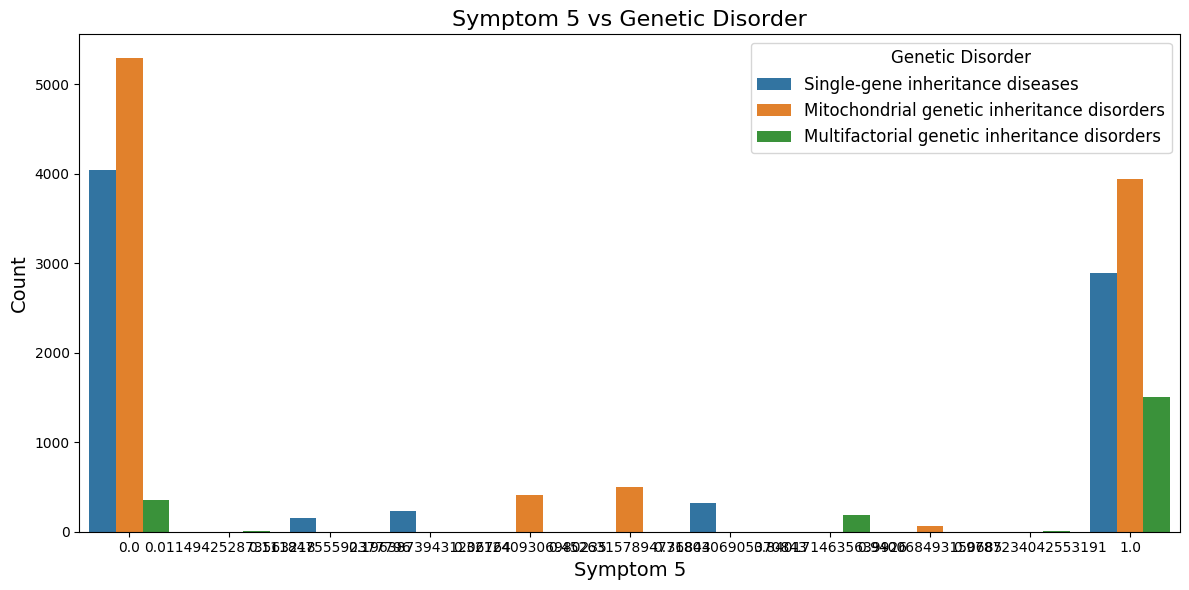

In [20]:
# symptom vs genetic disorder
symptom_cols = [c for c in df_train.columns if "Symptom" in c]

for col in symptom_cols:
    plt.figure(figsize=(12,6))   # bigger figure
    sns.countplot(x=df_train[col], hue=df_train["Genetic Disorder"])
    plt.title(f"{col} vs Genetic Disorder", fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.legend(title="Genetic Disorder", fontsize=12, title_fontsize=12)
    plt.tight_layout()
    plt.show()


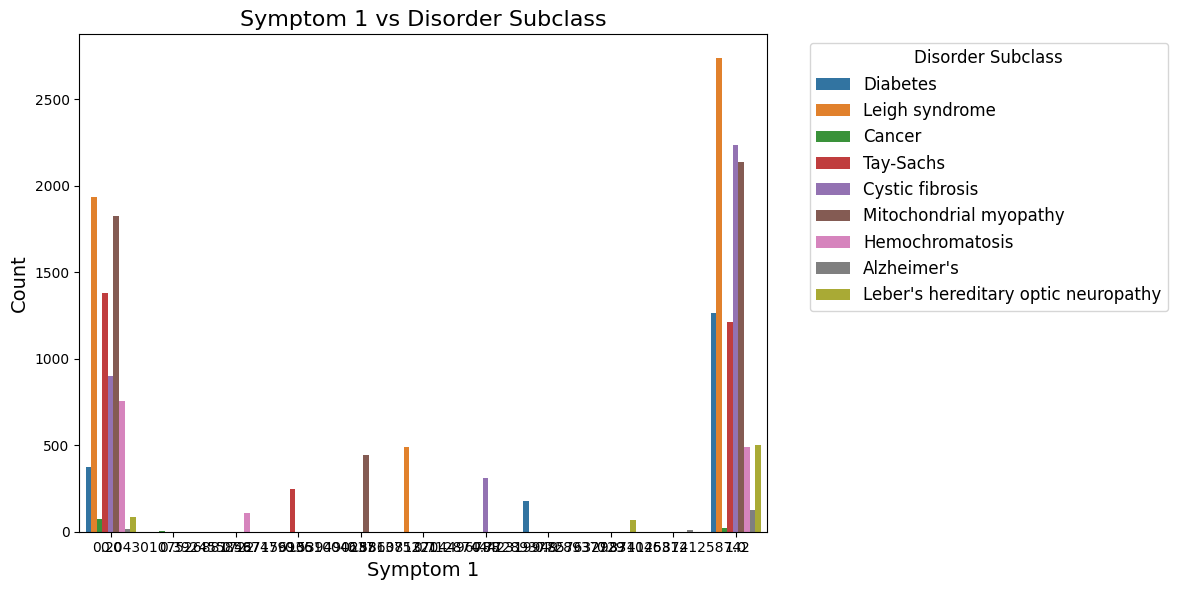

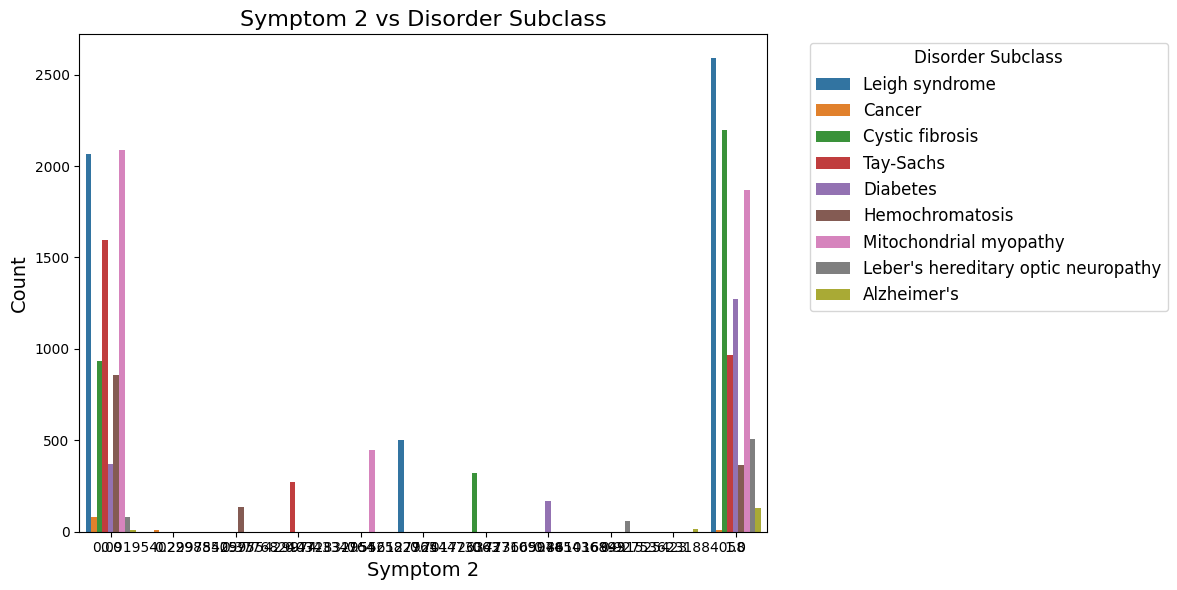

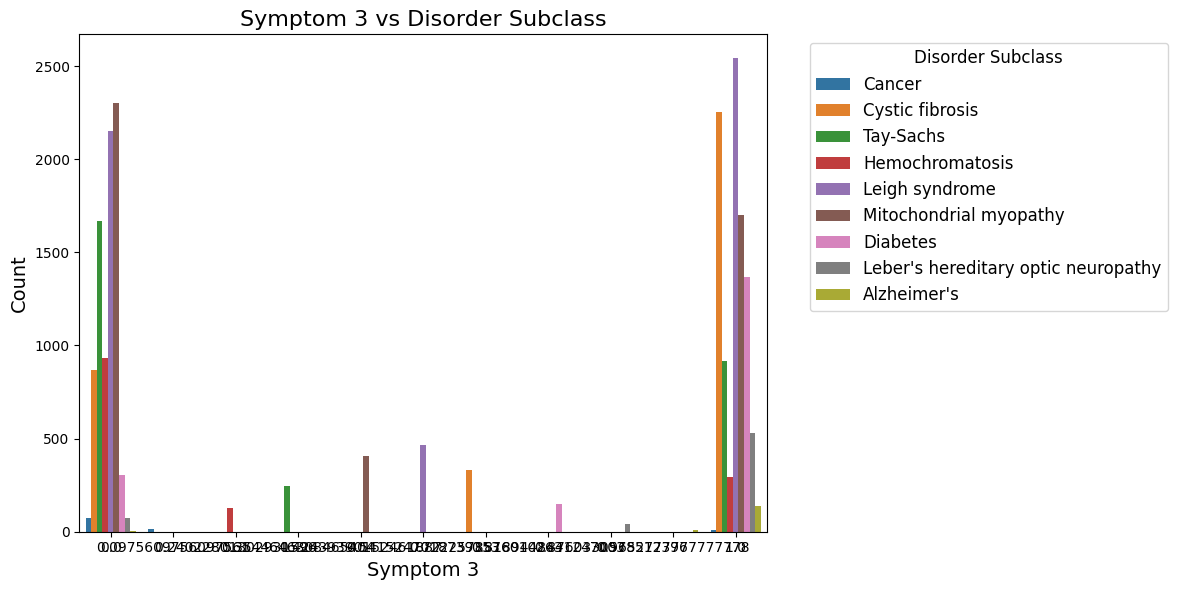

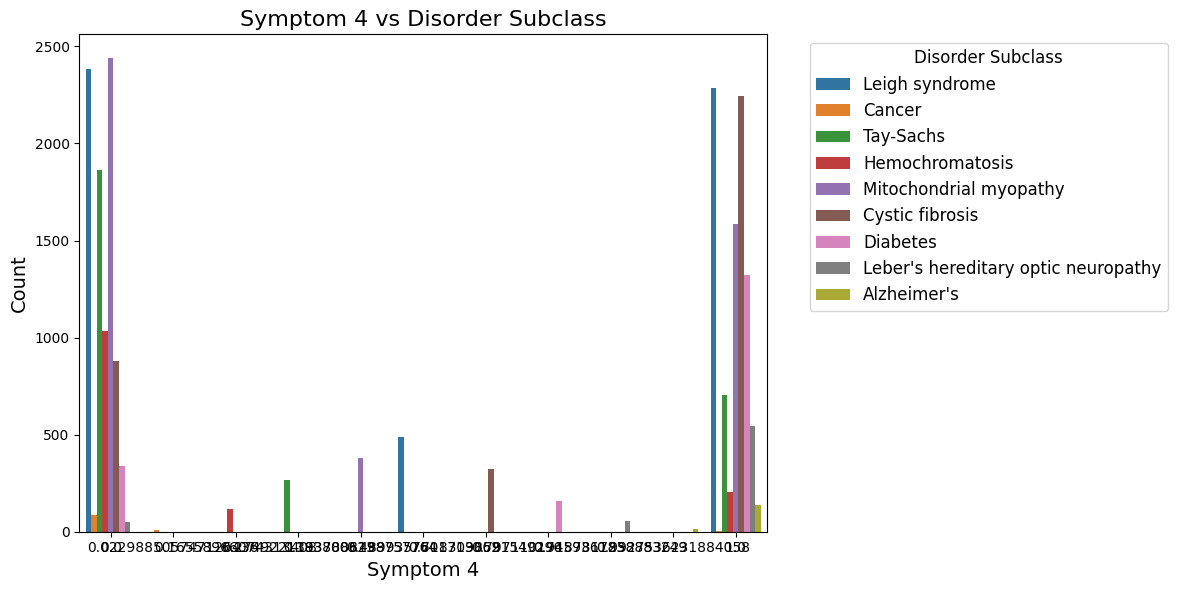

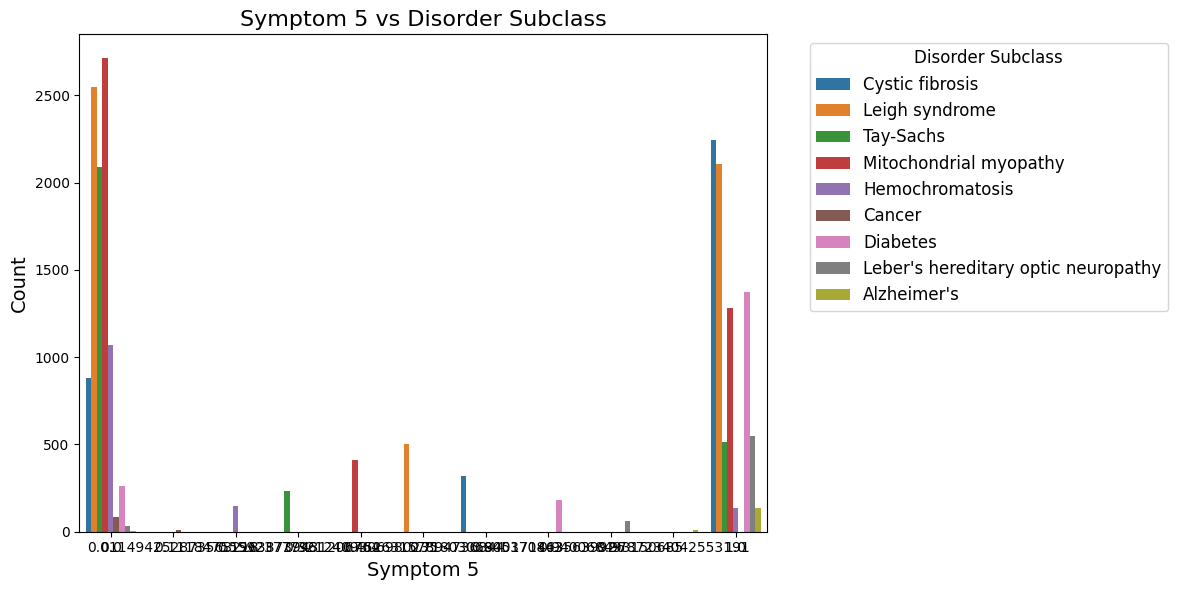

In [21]:
# remove leading/trailing spaces from all column names
df_train.columns = df_train.columns.str.strip()

# recompute symptom columns (now guaranteed to match)
symptom_cols = [c for c in df_train.columns if "Symptom" in c]

for col in symptom_cols:
    plt.figure(figsize=(12,6))
    sns.countplot(data=df_train, x=col, hue="Disorder Subclass")
    plt.title(f"{col} vs Disorder Subclass", fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.legend(title="Disorder Subclass", fontsize=12, title_fontsize=12, bbox_to_anchor=(1.05,1), loc='upper left')
    plt.tight_layout()
    plt.show()


In [22]:
#chi square test
train=df_train
df=train
df=df.apply(lambda x : pd.factorize(x)[0])+1
resultant = pd.DataFrame(data=[(0 for i in range(len(df.columns))) for i in range(len(df.columns))], 
                         columns=list(df.columns))
resultant.set_index(pd.Index(list(df.columns)), inplace = True)
from sklearn.feature_selection import chi2
for i in list(df.columns):
    for j in list(df.columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(df[i]).reshape(-1, 1), np.array(df[j]).reshape(-1, 1))
            resultant.loc[i,j] = p_val
print(resultant)

                                                    Patient Age  \
Patient Age                                        0.000000e+00   
Genes in mother's side                             9.709372e-01   
Inherited from father                              9.424856e-01   
Maternal gene                                      2.843572e-01   
Paternal gene                                      9.881866e-01   
Blood cell count (mcL)                             0.000000e+00   
Mother's age                                      1.588963e-261   
Father's age                                       0.000000e+00   
Status                                             9.999892e-01   
Respiratory Rate (breaths/min)                     9.947021e-01   
Heart Rate (rates/min                              9.921153e-01   
Test 1                                             1.000000e+00   
Test 2                                             1.000000e+00   
Test 3                                             1.000000e+0

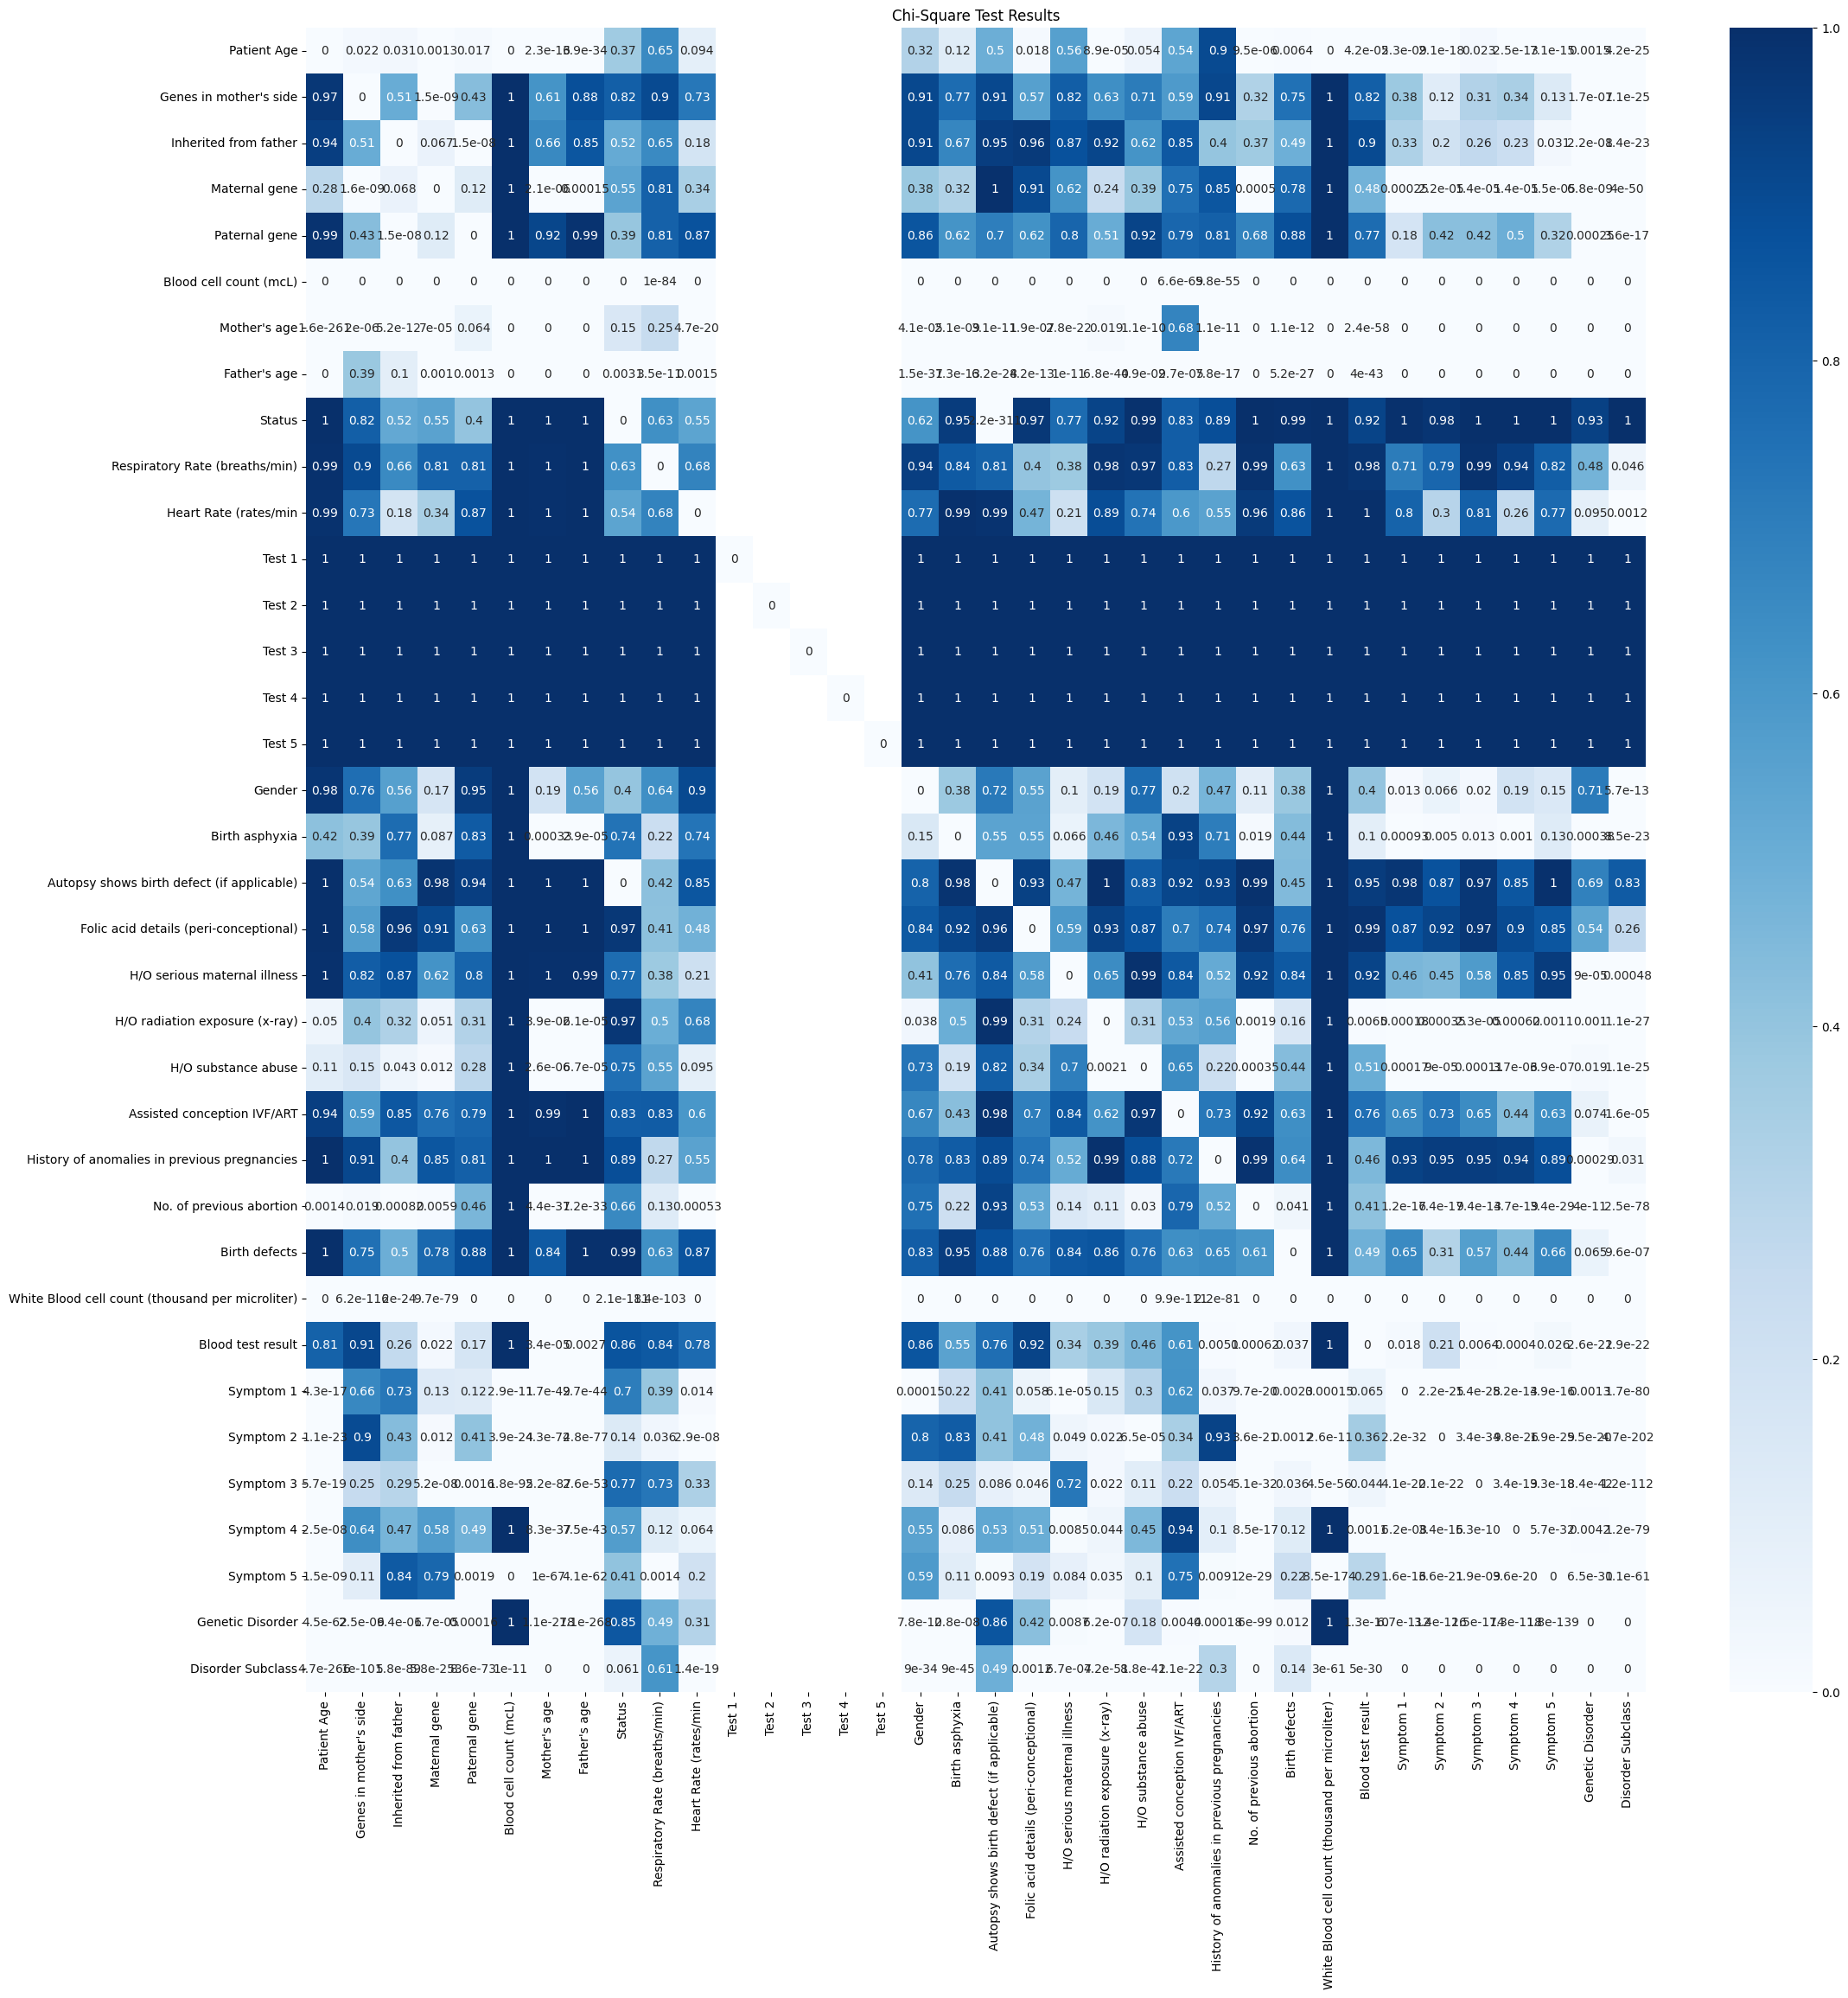

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(25,25))
sns.heatmap(resultant, annot=True, cmap='Blues')
plt.title('Chi-Square Test Results')
plt.show()

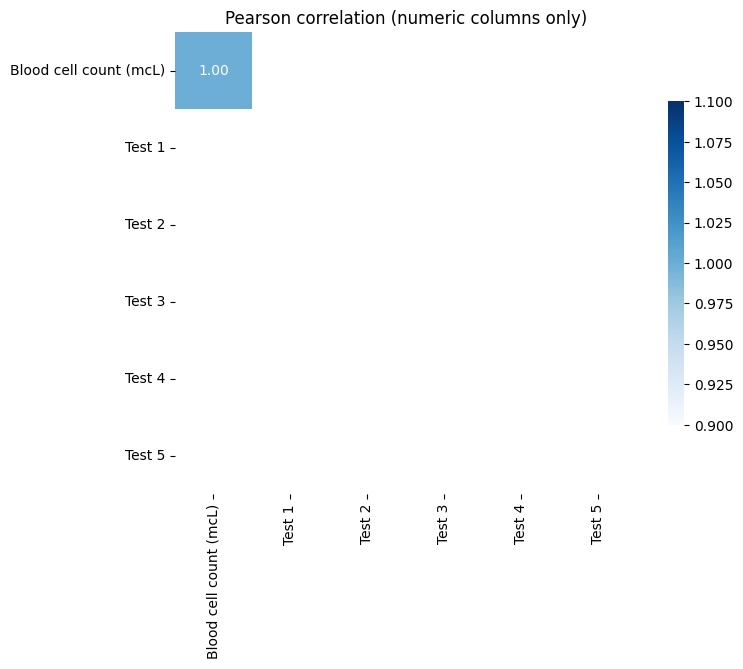

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# keep original
df = train.copy()

# select numeric only
num = df.select_dtypes(include=[np.number])

plt.figure(figsize=(8,6))
sns.heatmap(num.corr(), annot=True, cmap='Blues', fmt=".2f", square=True, cbar_kws={'shrink':0.7})
plt.title('Pearson correlation (numeric columns only)')
plt.show()


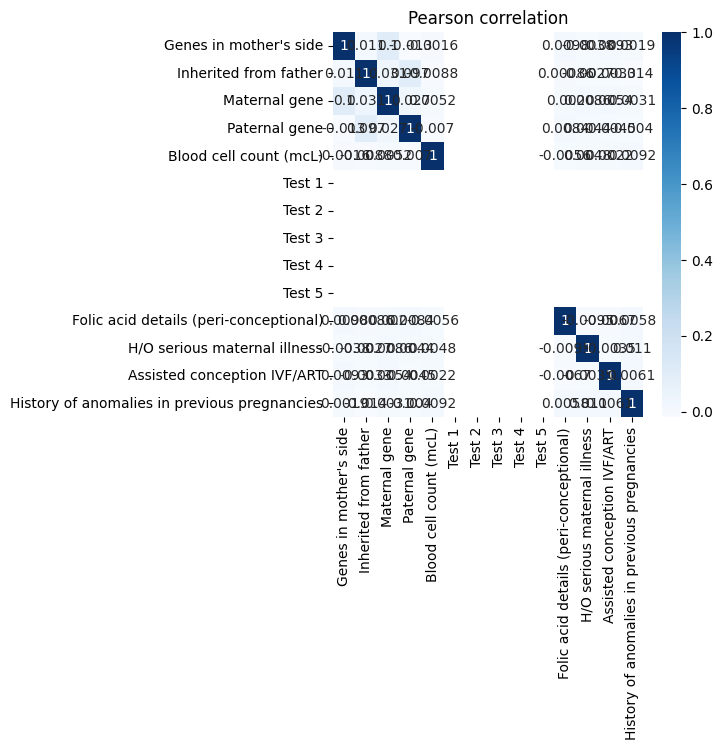

In [25]:
train_numeric = train.copy()
for col in train_numeric.select_dtypes(include=['object']).columns:
    # Check if the column contains 'Yes'/'No' values
    if set(train_numeric[col].unique()).issubset({'Yes', 'No', None, np.nan}):
        train_numeric[col] = train_numeric[col].map({'Yes': 1, 'No': 0})
    else:
        # For other categorical columns, you might want to use one-hot encoding
        # or exclude them from correlation analysis
        train_numeric = train_numeric.drop(columns=[col])

# Now create the correlation heatmap with numeric data only
fig = plt.figure(figsize=(5,5))
sns.heatmap(train_numeric.corr(), annot=True, cmap='Blues')
plt.title('Pearson correlation')
plt.show()

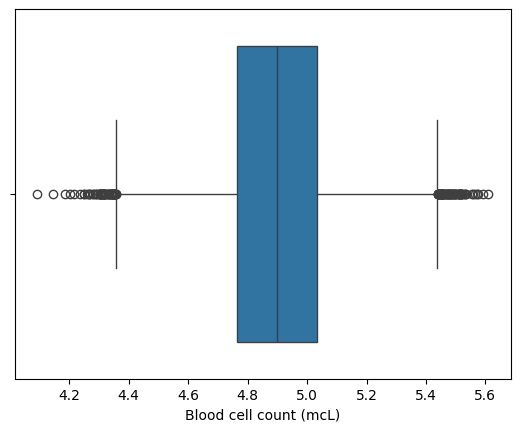

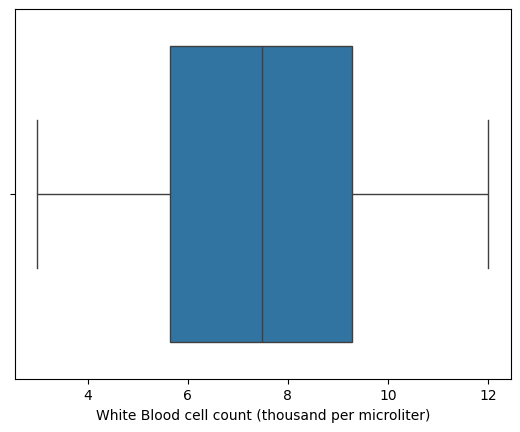

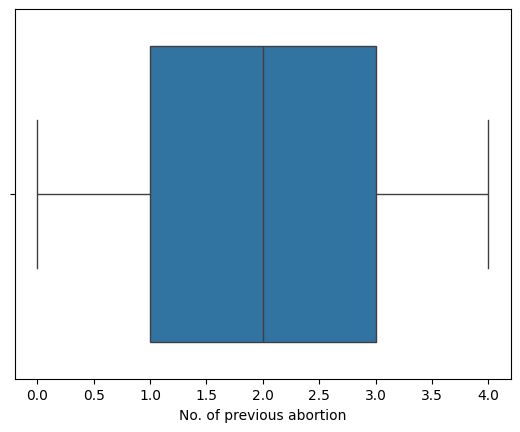

In [26]:
#handiling outliners
import matplotlib.pyplot as plt
for i in ('Blood cell count (mcL)','White Blood cell count (thousand per microliter)','No. of previous abortion'):
    sns.boxplot(x=train[i])
    plt.show()
    plt.clf()
    plt.close()

In [27]:
print('Outliers:')
for i in ('Blood cell count (mcL)','White Blood cell count (thousand per microliter)','No. of previous abortion'):
    Q1 = train[i].quantile(0.25)
    Q3 = train[i].quantile(0.75)
    IQR = Q3 - Q1
    print(i,'-',((train[i] < (Q1 - 1.5 * IQR)) | (train[i] > (Q3 + 1.5 * IQR))).sum())

Outliers:
Blood cell count (mcL) - 134
White Blood cell count (thousand per microliter) - 0
No. of previous abortion - 0


In [28]:
train['Blood cell count (mcL)_log'] = np.log1p(train['Blood cell count (mcL)'])

In [29]:
# Predicting the Disorder Subclass
#1. Without Considering Genetic Disorder as a feature 
#2. Considering Genetic Disorder as a feature

In [30]:
df_train.drop("Genetic Disorder",axis=1,inplace=True)

In [31]:
#Leber's hereditary optic neuropathy:1 
#Cystic fibrosis:0
#Diabetes:2
#Leigh syndrome:3
#Cancer:4
#Tay-Sachs:5
#Hemochromatosis:6
#Mitochondrial myopathy:7
#Alzheimer's:8
df_train["Disorder Subclass"]=[1 if i.strip()== "Leber's hereditary optic neuropathy" 
                                else 0 if i.strip() == "Cystic fibrosis" 
                               else 2 if i.strip()=="Diabetes" 
                               else 3 if i.strip()=="Leigh syndrome"
                               else 4 if i.strip()=="Cancer"
                               else 5 if i.strip()=="Tay-Sachs"
                               else 6 if i.strip()=="Hemochromatosis"
                               else 7 if i.strip()=="Mitochondrial myopathy"
                               else 8 for i in df_train["Disorder Subclass"]]



In [32]:
### Converting Categorical Data using One Hot Encoding
#One Hot Encoding 
catecols=["Genes in mother's side", "Inherited from father", 'Maternal gene',
       'Paternal gene','Respiratory Rate (breaths/min)','Heart Rate (rates/min','Birth asphyxia',
       'Autopsy shows birth defect (if applicable)','Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)', 'H/O substance abuse','Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies','Birth defects','Blood test result','Status','Gender']

one_hot_encoded_data = pd.get_dummies(df_train, columns = catecols)

df_train=one_hot_encoded_data
df_train

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,Test 4,Test 5,No. of previous abortion,...,Birth defects_Singular,Blood test result_abnormal,Blood test result_inconclusive,Blood test result_normal,Blood test result_slightly abnormal,Status_Alive,Status_Deceased,Gender_Ambiguous,Gender_Female,Gender_Male
0,2.0,4.760603,34.978814,42.159184,0,0,0,1,0,1.971039,...,False,False,False,False,True,True,False,False,False,True
1,4.0,4.910669,34.661983,23.0,0,0,0,1,0,2.01242,...,False,False,False,True,False,False,True,True,False,False
2,6.0,4.893297,41.0,22.0,0,0,0,1,0,4.0,...,True,False,False,True,False,True,False,True,False,False
3,12.0,4.705280,21.0,41.689446,0,0,0,1,0,1.0,...,True,False,True,False,False,False,True,False,False,True
4,11.0,4.720703,32.0,40.971429,0,0,0,1,0,4.0,...,False,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22078,4.0,5.258298,35.0,64.0,0,0,0,1,0,3.0,...,False,False,True,False,False,False,True,False,True,False
22079,8.0,4.974220,34.684094,56.0,0,0,0,1,0,2.0,...,False,False,True,False,False,True,False,True,False,False
22080,8.0,5.186470,35.0,51.0,0,0,0,1,0,2.0,...,True,False,False,True,False,False,True,False,False,True
22081,7.0,4.858543,19.0,41.689446,0,0,0,1,0,1.0,...,False,True,False,False,False,True,False,False,False,True


In [33]:
df_train = df_train.apply(pd.to_numeric,downcast="float")

In [34]:
df_train["sum of Mother's and fathers age avg"]=(df_train["Mother's age"]+df_train["Father's age"]) / 2
df_train["total symptom"]=(df_train["Symptom 1"]+df_train["Symptom 2"]+df_train["Symptom 3"]+df_train["Symptom 4"]+df_train["Symptom 5"]) / 5
df_train["total test"]=(df_train["Test 1"]+df_train["Test 2"]+df_train["Test 3"]+df_train["Test 4"]+df_train["Test 5"])

In [35]:
#spliting the dataset into train and test and validation dataset 
cols_names=['Blood cell count (mcL)','White Blood cell count (thousand per microliter)','No. of previous abortion']

x,y = df_train.loc[:,df_train.columns != 'Disorder Subclass'], df_train.loc[:,'Disorder Subclass']

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)


In [36]:
#normalizing the datasset 
sc = MinMaxScaler()
x_train = sc.fit_transform(X_train[cols_names])  
x_test = sc.transform(X_test[cols_names])  
x_val = sc.transform(X_val[cols_names])  

X_test[cols_names]=x_test
X_train[cols_names]=x_train
X_val[cols_names]=x_val

In [37]:
# Predicting the Disorder Subclass using various models

In [38]:
df_train = df_train.copy()
df_train = pd.get_dummies(df_train, drop_first=True)


In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluate(model, X_train, X_val, y_train, y_val):
    """Train + evaluate model and print metrics"""
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    
    print("Accuracy:", accuracy_score(y_val, preds))
    print("\nClassification Report:\n", classification_report(y_val, preds))
    print("\nConfusion Matrix:\n", confusion_matrix(y_val, preds))
    


In [40]:
#logistic regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=2000)
evaluate(logreg, X_train, X_val, y_train, y_val)


Accuracy: 0.5227215666582977

Classification Report:
               precision    recall  f1-score   support

         0.0       0.56      0.64      0.60       720
         1.0       0.50      0.29      0.37       127
         2.0       0.44      0.39      0.41       337
         3.0       0.57      0.62      0.59      1036
         4.0       1.00      0.04      0.08        23
         5.0       0.44      0.45      0.44       550
         6.0       0.51      0.39      0.44       271
         7.0       0.51      0.51      0.51       888
         8.0       0.50      0.03      0.06        31

    accuracy                           0.52      3983
   macro avg       0.56      0.37      0.39      3983
weighted avg       0.52      0.52      0.52      3983


Confusion Matrix:
 [[462  17  83 142   0   1   0  15   0]
 [ 42  37  47   0   0   0   0   0   1]
 [168  12 132  25   0   0   0   0   0]
 [119   0  17 644   0  48   6 202   0]
 [  0   0   0   0   1   6  16   0   0]
 [  3   0   0  74   0 245 

In [41]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, random_state=1)
evaluate(rf, X_train, X_val, y_train, y_val)


Accuracy: 0.6841576700979162

Classification Report:
               precision    recall  f1-score   support

         0.0       0.68      0.76      0.72       720
         1.0       0.77      0.34      0.47       127
         2.0       0.61      0.55      0.58       337
         3.0       0.70      0.82      0.76      1036
         4.0       1.00      0.04      0.08        23
         5.0       0.66      0.65      0.66       550
         6.0       0.72      0.43      0.54       271
         7.0       0.68      0.70      0.69       888
         8.0       1.00      0.06      0.12        31

    accuracy                           0.68      3983
   macro avg       0.76      0.48      0.51      3983
weighted avg       0.69      0.68      0.67      3983


Confusion Matrix:
 [[549   4  45 104   0   1   0  17   0]
 [ 37  43  47   0   0   0   0   0   0]
 [130   2 185  20   0   0   0   0   0]
 [ 64   0   6 845   0  22   0  99   0]
 [  0   0   0   0   1   4  18   0   0]
 [  1   0   0  56   0 359 

In [42]:
#xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=1
)

evaluate(xgb, X_train, X_val, y_train, y_val)


Accuracy: 0.7466733617875972

Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.81      0.78       720
         1.0       0.74      0.55      0.63       127
         2.0       0.70      0.69      0.69       337
         3.0       0.77      0.81      0.79      1036
         4.0       0.89      0.35      0.50        23
         5.0       0.70      0.74      0.72       550
         6.0       0.75      0.62      0.68       271
         7.0       0.76      0.74      0.75       888
         8.0       0.83      0.32      0.47        31

    accuracy                           0.75      3983
   macro avg       0.77      0.63      0.67      3983
weighted avg       0.75      0.75      0.74      3983


Confusion Matrix:
 [[580   6  50  71   0   2   0  11   0]
 [ 21  70  34   0   0   0   0   0   2]
 [ 82   7 233  15   0   0   0   0   0]
 [ 69   0   9 842   0  26   3  87   0]
 [  0   0   0   0   8   2  13   0   0]
 [  1   0   0  34   0 407 

In [43]:
#gradient boosting 
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
evaluate(gb, X_train, X_val, y_train, y_val)


Accuracy: 0.7474265628922923

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.83      0.79       720
         1.0       0.84      0.55      0.67       127
         2.0       0.70      0.69      0.70       337
         3.0       0.78      0.81      0.79      1036
         4.0       0.67      0.35      0.46        23
         5.0       0.69      0.72      0.71       550
         6.0       0.74      0.61      0.67       271
         7.0       0.76      0.74      0.75       888
         8.0       0.58      0.45      0.51        31

    accuracy                           0.75      3983
   macro avg       0.72      0.64      0.67      3983
weighted avg       0.75      0.75      0.75      3983


Confusion Matrix:
 [[600   4  50  59   0   0   0   7   0]
 [ 23  70  30   0   0   0   0   0   4]
 [ 85   6 233   9   0   0   0   0   4]
 [ 79   0   6 835   0  26   3  86   1]
 [  0   0   0   0   8   0  15   0   0]
 [  3   0   0  38   1 394 

In [44]:
#k nearest neighbour 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_val_scaled = sc.transform(X_val)

knn = KNeighborsClassifier(n_neighbors=5)
evaluate(knn, X_train_scaled, X_val_scaled, y_train, y_val)


Accuracy: 0.34772784333417023

Classification Report:
               precision    recall  f1-score   support

         0.0       0.38      0.51      0.43       720
         1.0       0.17      0.09      0.12       127
         2.0       0.30      0.27      0.28       337
         3.0       0.37      0.44      0.40      1036
         4.0       1.00      0.04      0.08        23
         5.0       0.29      0.28      0.29       550
         6.0       0.26      0.14      0.18       271
         7.0       0.37      0.30      0.33       888
         8.0       0.00      0.00      0.00        31

    accuracy                           0.35      3983
   macro avg       0.35      0.23      0.24      3983
weighted avg       0.34      0.35      0.34      3983


Confusion Matrix:
 [[366  27  85 159   0  25   2  54   2]
 [ 57  12  22  27   0   0   0   8   1]
 [141  18  90  69   0   5   0  14   0]
 [231   9  63 460   0 105  21 147   0]
 [  0   0   0   6   1   7   8   1   0]
 [ 48   3   6 161   0 155

In [45]:
#svm 
from sklearn.svm import SVC

svm = SVC(kernel='rbf')
evaluate(svm, X_train_scaled, X_val_scaled, y_train, y_val)


Accuracy: 0.5084107456690936

Classification Report:
               precision    recall  f1-score   support

         0.0       0.55      0.64      0.59       720
         1.0       0.52      0.21      0.30       127
         2.0       0.44      0.40      0.42       337
         3.0       0.55      0.63      0.59      1036
         4.0       0.00      0.00      0.00        23
         5.0       0.45      0.43      0.44       550
         6.0       0.53      0.32      0.40       271
         7.0       0.47      0.48      0.48       888
         8.0       0.00      0.00      0.00        31

    accuracy                           0.51      3983
   macro avg       0.39      0.35      0.36      3983
weighted avg       0.50      0.51      0.50      3983


Confusion Matrix:
 [[463   8  87 143   0   2   0  17   0]
 [ 46  27  54   0   0   0   0   0   0]
 [165  10 134  28   0   0   0   0   0]
 [121   0  12 648   0  44   5 206   0]
 [  0   0   0   0   0   5  18   0   0]
 [  4   0   0  78   0 238 

In [46]:
#decision tree 
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=1)
evaluate(dt, X_train, X_val, y_train, y_val)


Accuracy: 0.579713783580216

Classification Report:
               precision    recall  f1-score   support

         0.0       0.62      0.65      0.63       720
         1.0       0.49      0.49      0.49       127
         2.0       0.54      0.55      0.54       337
         3.0       0.63      0.61      0.62      1036
         4.0       0.31      0.39      0.35        23
         5.0       0.53      0.56      0.54       550
         6.0       0.55      0.55      0.55       271
         7.0       0.57      0.55      0.56       888
         8.0       0.36      0.29      0.32        31

    accuracy                           0.58      3983
   macro avg       0.51      0.51      0.51      3983
weighted avg       0.58      0.58      0.58      3983


Confusion Matrix:
 [[467  22  79  97   0   9   1  40   5]
 [ 30  62  26   4   0   0   0   1   4]
 [ 87  26 185  26   0   0   1   5   7]
 [ 98   6  38 630   0  77  13 174   0]
 [  0   0   0   2   9   4   5   3   0]
 [ 11   0   1  65   5 308  

In [47]:
#naive bayes 
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
evaluate(nb, X_train, X_val, y_train, y_val)


Accuracy: 0.46924428822495606

Classification Report:
               precision    recall  f1-score   support

         0.0       0.56      0.52      0.54       720
         1.0       0.30      0.35      0.33       127
         2.0       0.40      0.31      0.35       337
         3.0       0.56      0.58      0.57      1036
         4.0       0.08      0.65      0.14        23
         5.0       0.46      0.37      0.41       550
         6.0       0.39      0.27      0.32       271
         7.0       0.49      0.48      0.49       888
         8.0       0.15      0.58      0.24        31

    accuracy                           0.47      3983
   macro avg       0.38      0.46      0.38      3983
weighted avg       0.49      0.47      0.48      3983


Confusion Matrix:
 [[376  54  92 140   0   3   0  35  20]
 [ 21  45  26   0   0   0   0   0  35]
 [111  42 106  31   0   0   0   1  46]
 [127   3  30 605   6  47  19 198   1]
 [  0   0   0   0  15   2   6   0   0]
 [  8   0   0  75  54 204

In [48]:
best_model = rf   # for example
pred_test = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, pred_test))

Test Accuracy: 0.6768767260858649


In [49]:
gbmc_m = GradientBoostingClassifier(verbose=False,learning_rate = 0.15, random_state=35).fit(X_train,y_train)

predict = gbmc_m.predict(X_val)

print("Accuracy -->",accuracy_score(y_val,predict))

Accuracy --> 0.7506904343459704


Accuracy of the GBM on test set: 0.733
              precision    recall  f1-score   support

         0.0       0.74      0.76      0.75       690
         1.0       0.73      0.54      0.62       114
         2.0       0.70      0.69      0.70       352
         3.0       0.73      0.79      0.76      1030
         4.0       0.60      0.18      0.27        17
         5.0       0.73      0.71      0.72       561
         6.0       0.80      0.66      0.72       276
         7.0       0.73      0.75      0.74       912
         8.0       0.73      0.35      0.48        31

    accuracy                           0.73      3983
   macro avg       0.72      0.60      0.64      3983
weighted avg       0.73      0.73      0.73      3983



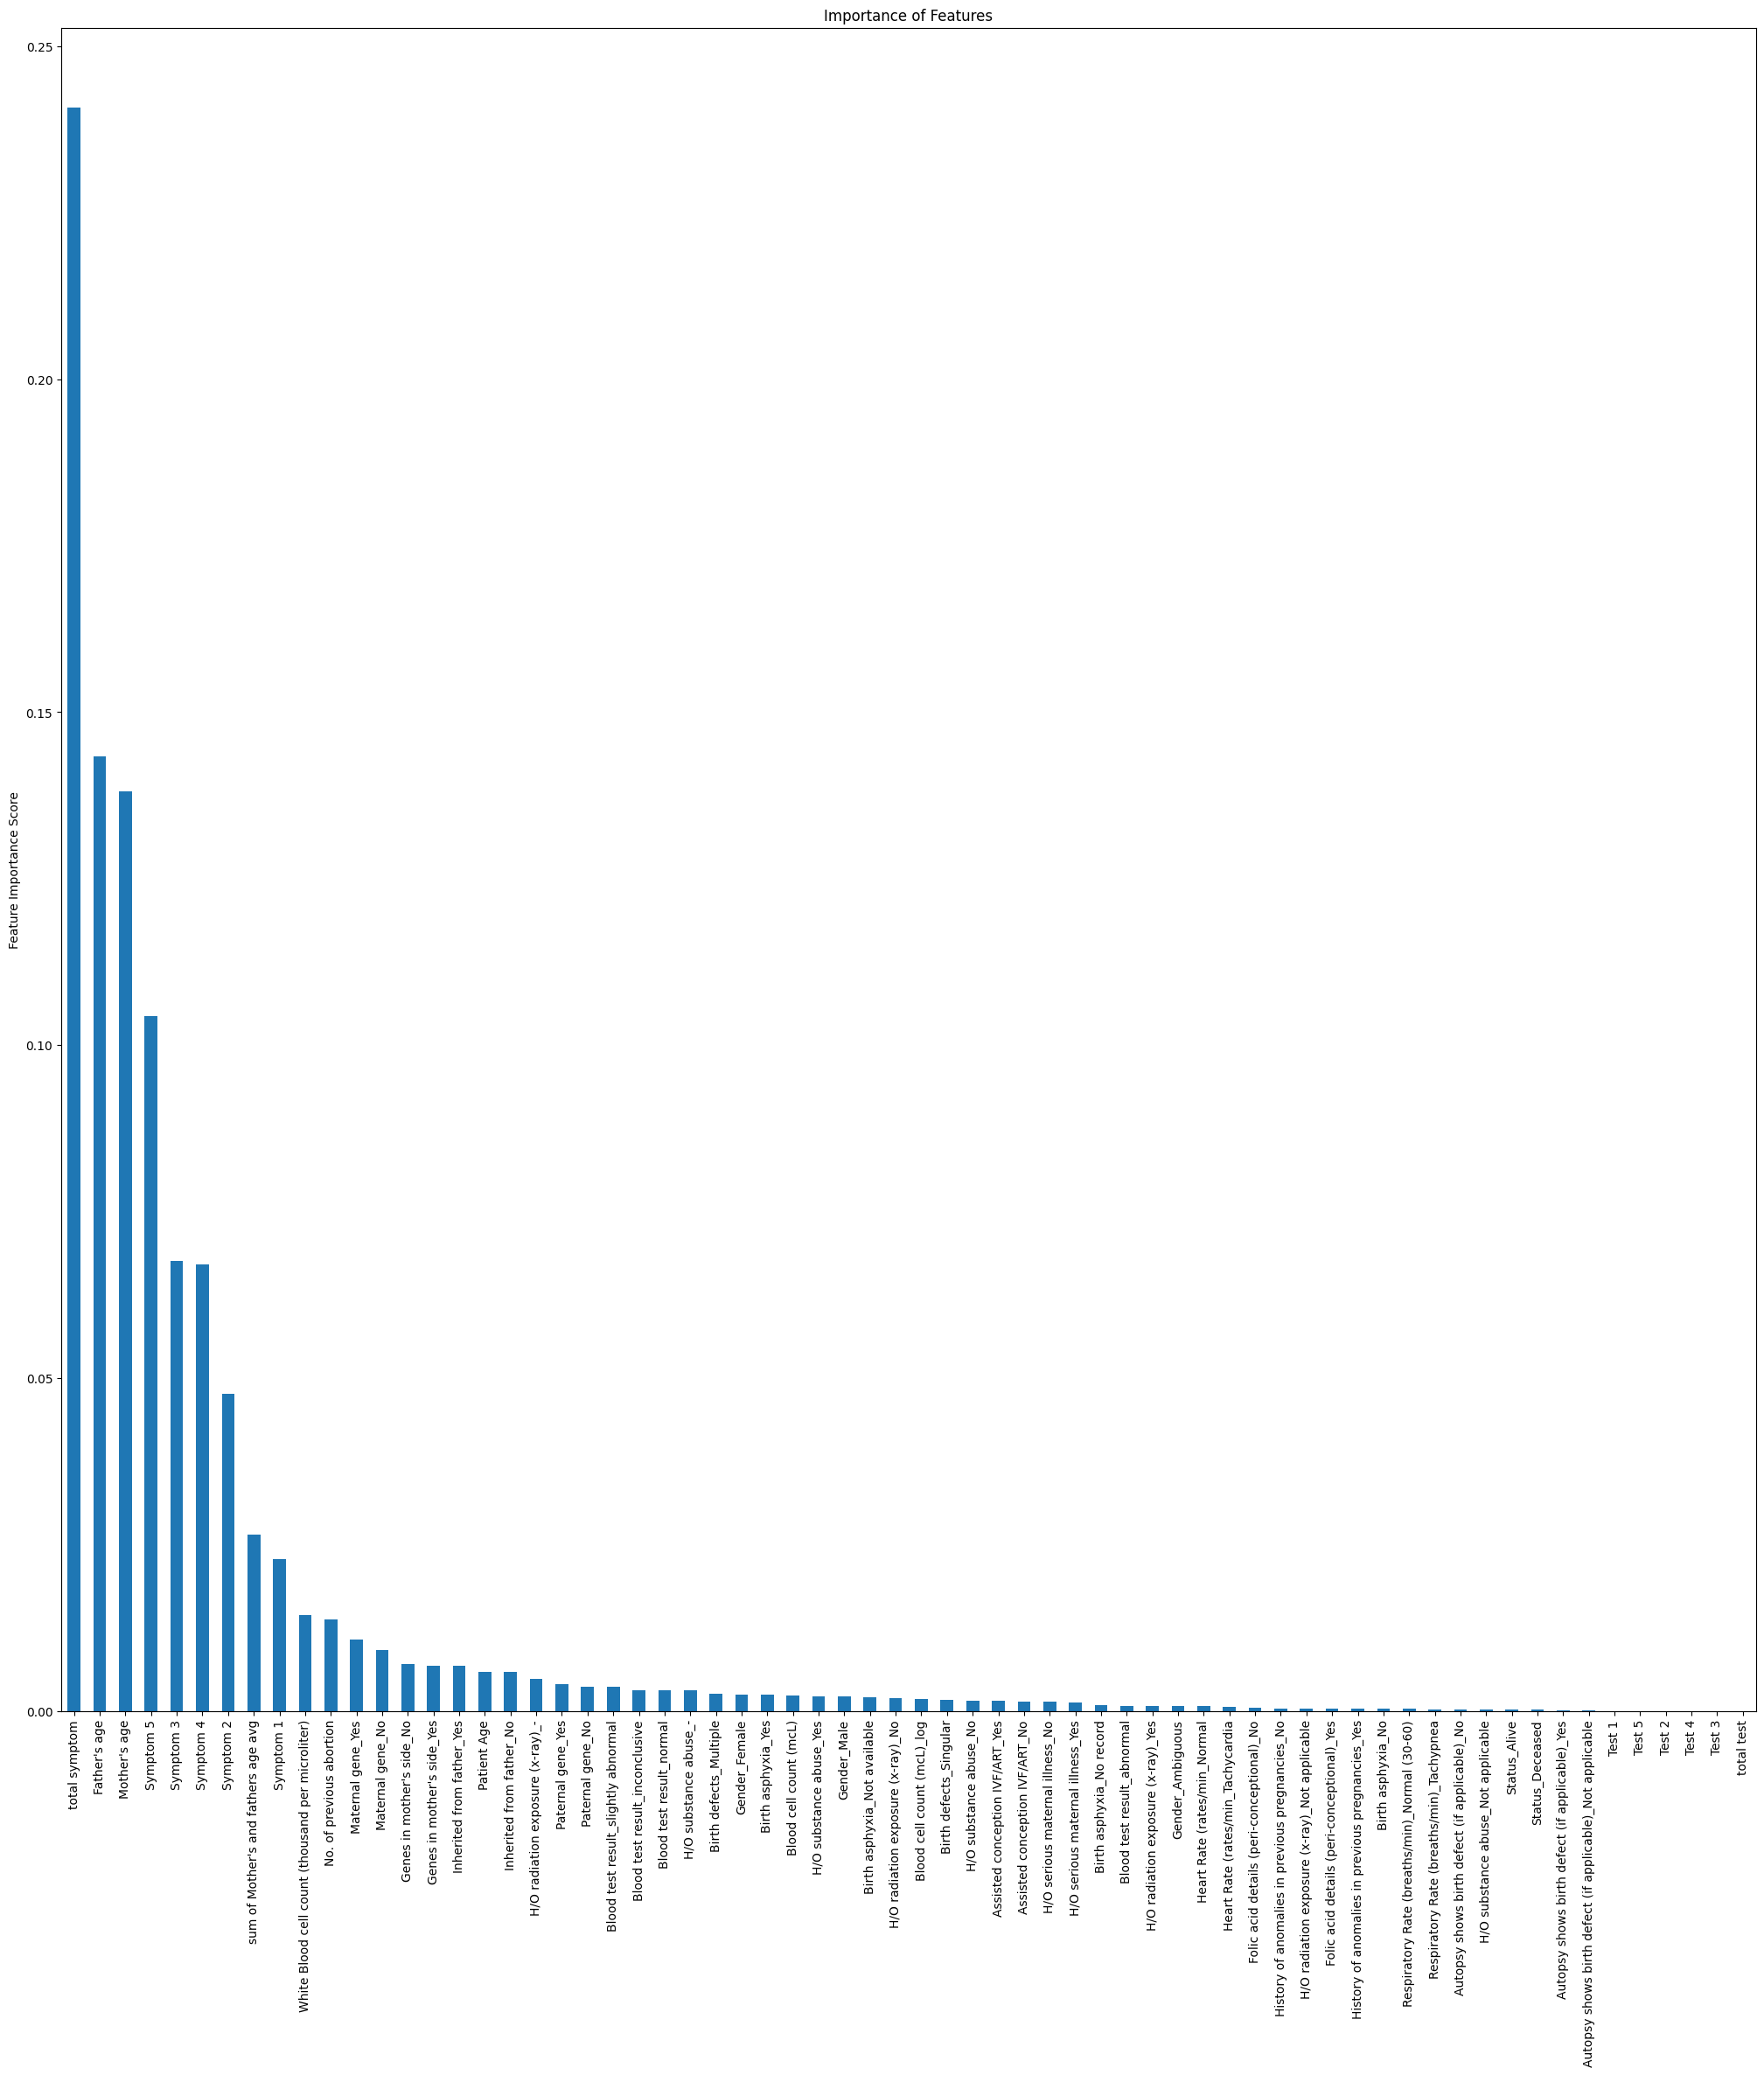

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
fig = plt.figure(figsize=(25,25))
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(X_test, y_test)))
pred=baseline.predict(X_test)
print(classification_report(y_test ,pred))

In [51]:
#tuning learning rate and n_estimators

In [52]:
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test3, scoring='accuracy',n_jobs=4, cv=3)
tuning.fit(X_train,y_train)
tuning.cv_results_, tuning.best_params_, tuning.best_score_

({'mean_fit_time': array([ 21.17258962,  54.70207286, 106.99242989, 150.51589322,
         199.56669307, 240.29442716, 277.35037684,  21.31470521,
          51.46982829, 102.14525684, 156.65244325, 215.47736295,
         250.95778243, 295.20614028,  22.08880003,  49.57967774,
         101.30126667, 153.60523446, 205.84358915, 250.10891557,
         300.83877254,  20.50006866,  52.27934567,  96.68790666,
         107.62098813, 155.81659905, 203.02777791, 250.16746338,
          16.12072659,  57.73757474, 135.37142022, 183.80802027,
         166.75611146, 231.29126223, 303.26147676,  12.95176856,
          56.81892506, 105.83720589, 164.31282489, 232.84436091,
         260.19214368, 308.98527106]),
  'std_fit_time': array([ 0.04711663,  1.06422243,  0.61682432,  1.58732517,  2.97860638,
          3.94386811,  0.38157763,  0.4813438 ,  0.38099779,  0.17919521,
          1.87488869,  1.20651538,  2.45706426,  2.9653555 ,  2.1334215 ,
          0.91203204,  0.08423472,  0.33562822,  0.74466

In [53]:
#tuning max depth

In [54]:
p_test2 = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.01,n_estimators=1500, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test2, scoring='accuracy',n_jobs=4,cv=3)
tuning.fit(X_train,y_train)
tuning.cv_results_, tuning.best_params_, tuning.best_score_

({'mean_fit_time': array([138.32965668, 217.38306244, 353.97348229, 472.65701675,
         619.81725367, 557.32227445]),
  'std_fit_time': array([ 1.312432  , 13.83297521, 15.64926724,  2.83202563, 20.22740861,
         98.26581246]),
  'mean_score_time': array([1.30661368, 4.14937488, 3.91425268, 9.79614449, 4.38489366,
         2.76764544]),
  'std_score_time': array([0.26570363, 2.56912595, 0.64606425, 5.41788998, 0.76408487,
         0.83055473]),
  'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 7],
               mask=[False, False, False, False, False, False],
         fill_value=999999),
  'params': [{'max_depth': 2},
   {'max_depth': 3},
   {'max_depth': 4},
   {'max_depth': 5},
   {'max_depth': 6},
   {'max_depth': 7}],
  'split0_test_score': array([0.71554105, 0.73663068, 0.74566909, 0.74014562, 0.73211147,
         0.72834547]),
  'split1_test_score': array([0.72282199, 0.74843083, 0.75043937, 0.75219684, 0.74692443,
         0.74516696]),
  'split2_test_score': array(

In [55]:
#first evaluation of new model 

Accuracy of the GBM on test set: 0.755
              precision    recall  f1-score   support

         0.0       0.75      0.78      0.76       690
         1.0       0.69      0.53      0.60       114
         2.0       0.70      0.71      0.71       352
         3.0       0.76      0.80      0.78      1030
         4.0       0.75      0.18      0.29        17
         5.0       0.75      0.76      0.75       561
         6.0       0.80      0.71      0.75       276
         7.0       0.77      0.76      0.77       912
         8.0       0.79      0.35      0.49        31

    accuracy                           0.76      3983
   macro avg       0.75      0.62      0.65      3983
weighted avg       0.76      0.76      0.75      3983



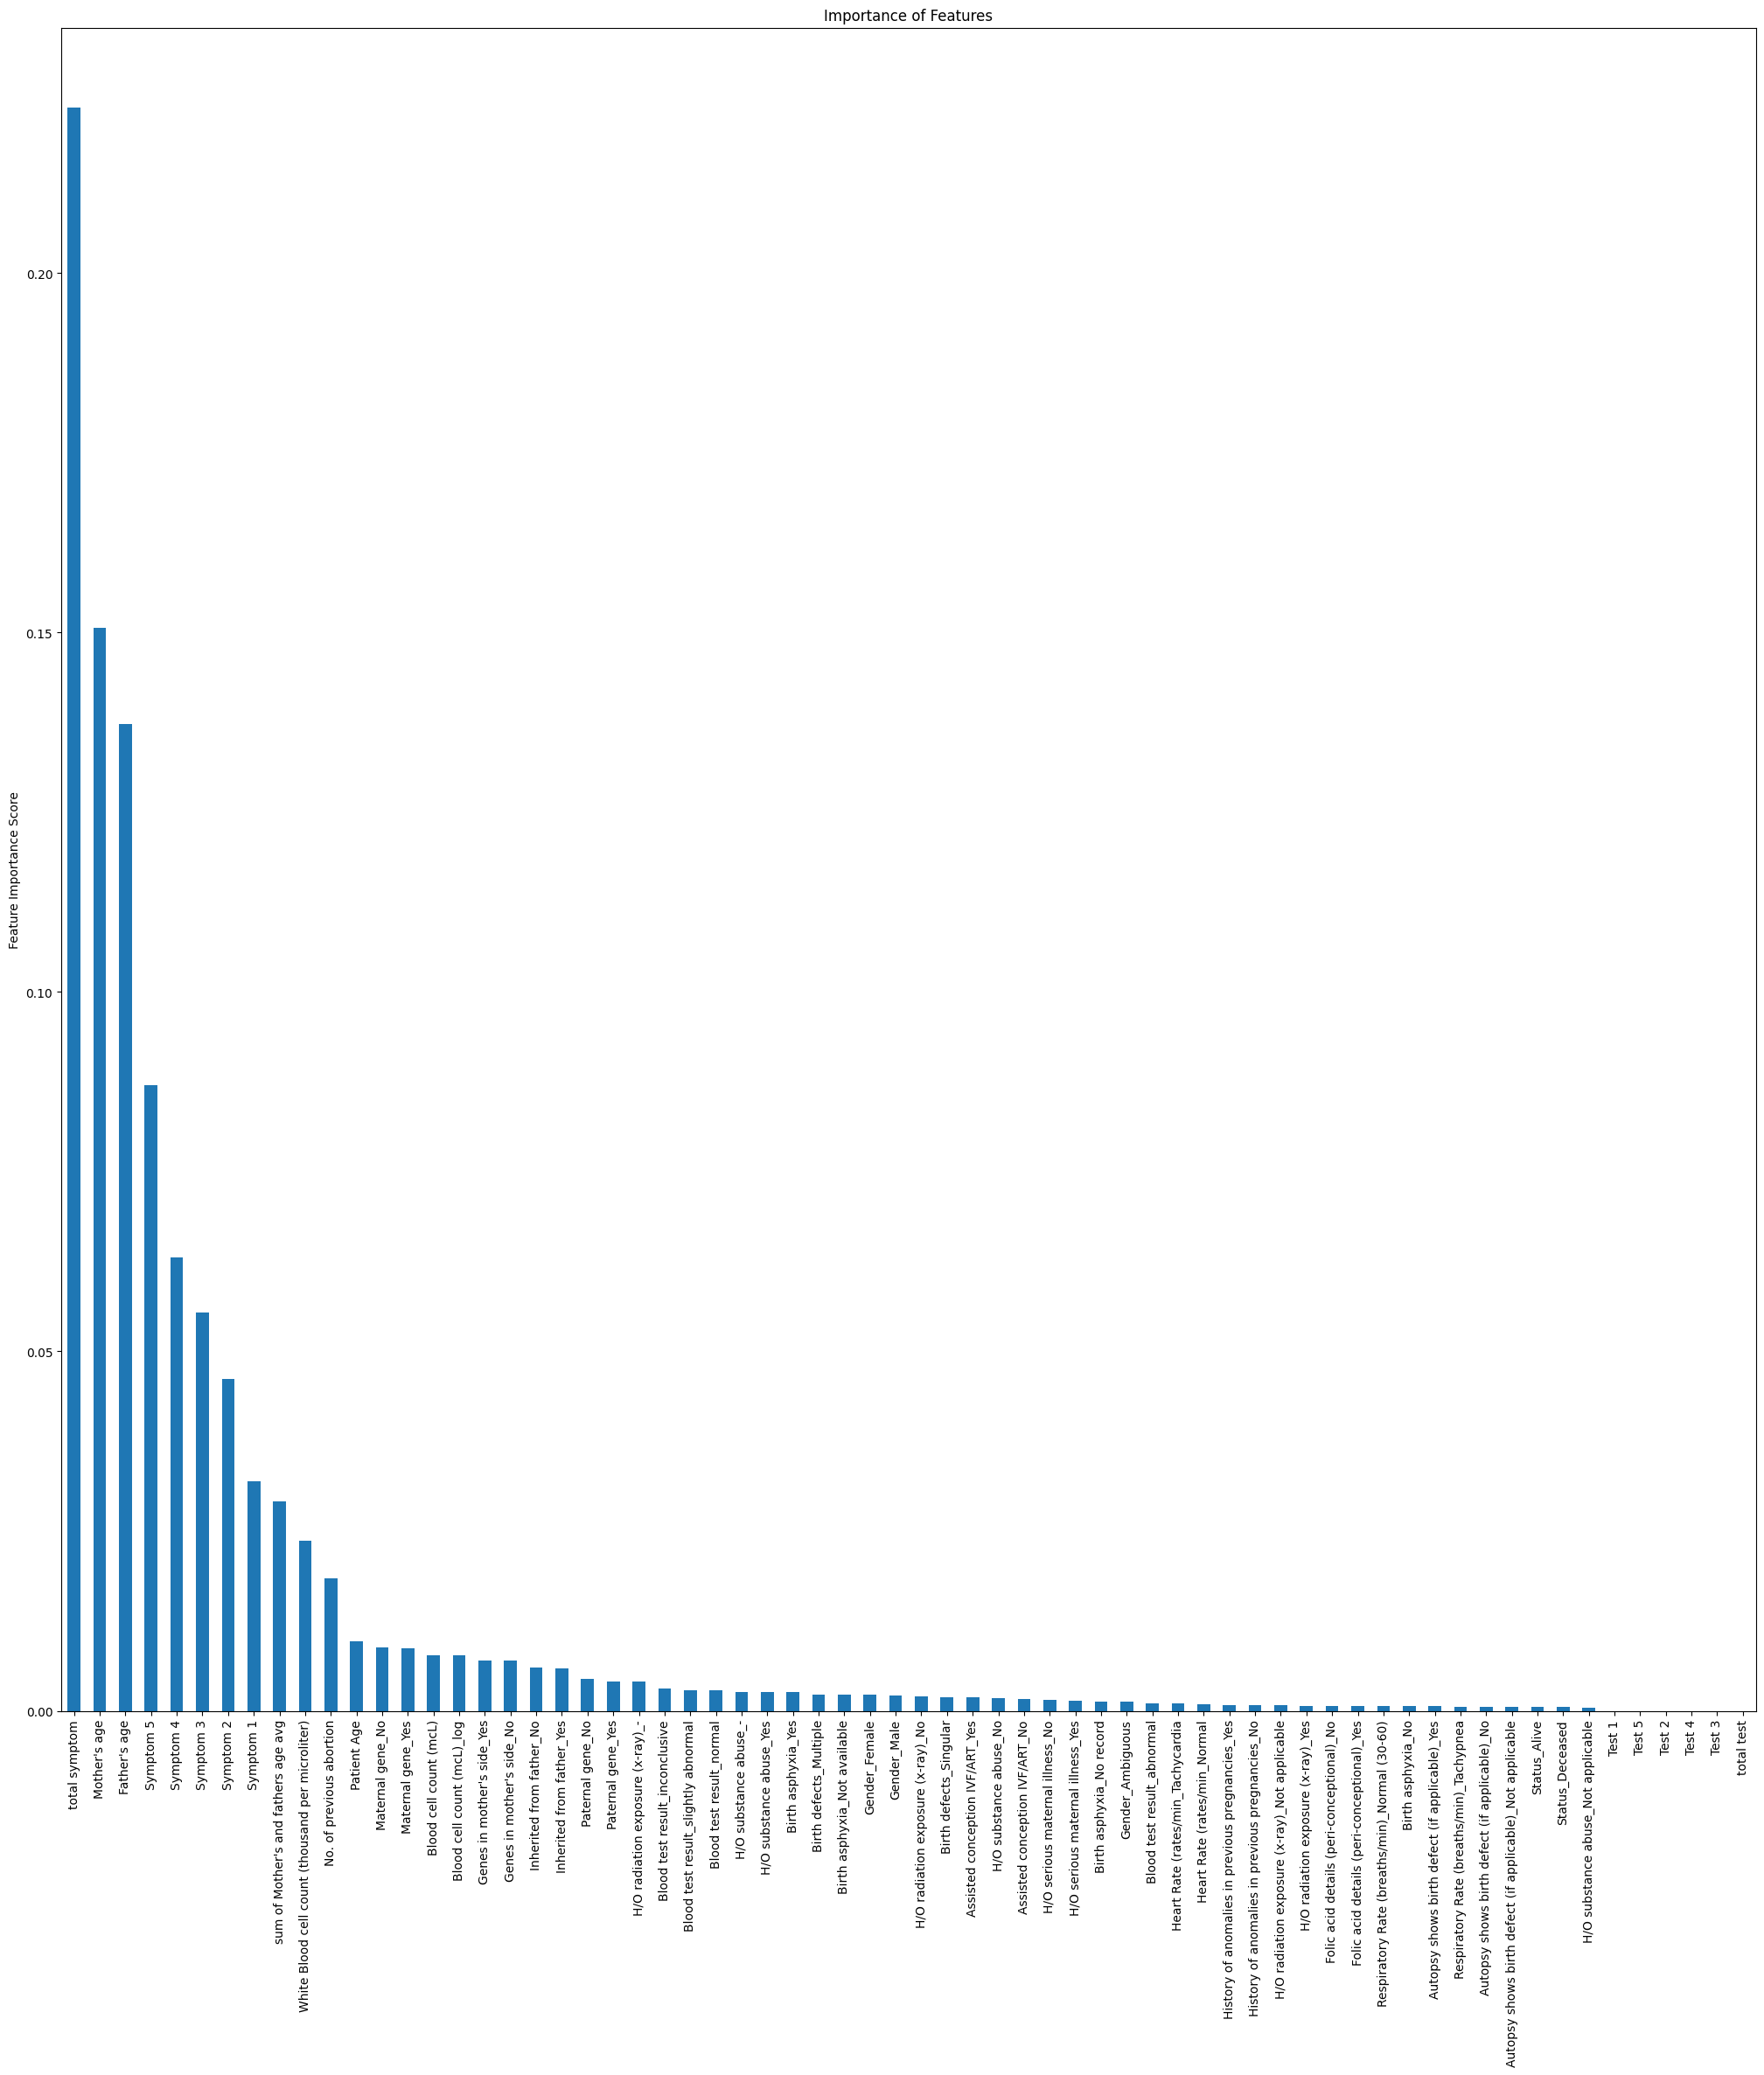

In [56]:
import matplotlib.pyplot as plt
model1 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
model1.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(model1.feature_importances_, predictors).sort_values(ascending=False)
fig = plt.figure(figsize=(25,25))
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(model1.score(X_test, y_test)))
pred=model1.predict(X_test)
print(classification_report(y_test, pred))

In [57]:
### Gradient Boosting Classifier with Cross Validation (k=10)

In [58]:
from sklearn.model_selection import cross_val_score
model = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
kfold = model_selection.KFold(n_splits=10)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 74.72% (0.89%)


In [59]:
### Ensemble Model with k-fold crossvalidation (k=10)

In [60]:
from sklearn.ensemble import VotingClassifier

kfold = model_selection.KFold(n_splits=10)

model_1 = XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.3,max_depth = 5, alpha = 10, n_estimators = 10)
model_2 = GradientBoostingClassifier(verbose=False,learning_rate = 0.15)

final_model = VotingClassifier(estimators=[ ('xgb', model_1), ('gb', model_2)])
 
# training all the model on the train dataset
final_model.fit(X_train, y_train)
 
# predicting the output on the test dataset
pred_final = final_model.predict(X_val)

score = final_model.score(X_val, y_val)
print('Accuracy Score: ', score)

classification_report(y_val, pred_final)
print(classification_report)

accuracy = accuracy_score(y_val, pred_final)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

results = model_selection.cross_val_score(final_model, X_train, y_train, cv=kfold)
print(results.mean())

Accuracy Score:  0.7323625407983931
<function classification_report at 0x000001CD7FEBA8C0>
Accuracy: 73.24%
0.726252321580006


In [61]:
### Ensemble Model with Cross Validation and Hyperparameter Tuning

In [62]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

model_1 = XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.3,max_depth = 5, alpha = 10, n_estimators = 10)
model_2 = GradientBoostingClassifier(verbose=False,learning_rate = 0.15)

final_model = VotingClassifier(estimators=[ ('xgb', model_1), ('gb', model_2)])
cvm = cross_val_score(final_model, X_train, y_train)
base_score = cvm.mean()
base_std = cvm.std()
print('\n')
print(f'The average base cross-validation score is {round(base_score,4)} (+- {round(base_std,4)})')

params = {'voting':['hard', 'soft'],
          'weights':[(1,1), (2,1), 
                     (1,2), (1,1),
                     (1,1), (1,1), 
                     (1,1), (2,1)]}

#fit gridsearch & print best params
grid = GridSearchCV(final_model, params)
grid.fit(X_train, y_train)
print('\n')
print(f'The best params is : {grid.best_params_}')

#print the final cv score
tuned_vc = VotingClassifier([('xgb', model_1),('gb', model_2)], 
                             **grid.best_params_, n_jobs = -1)
tuned_cvm = cross_val_score(tuned_vc, X_train, y_train)
tuned_score = tuned_cvm.mean()
tuned_std = tuned_cvm.std()
print('\n')
print(f'The average tuned cross-validation score is {round(tuned_score, 4)} (+- {round(tuned_std, 4)})')




The average base cross-validation score is 0.7254 (+- 0.0088)


The best params is : {'voting': 'soft', 'weights': (1, 2)}


The average tuned cross-validation score is 0.7495 (+- 0.0097)


# 2.Considering Genetic Disorder as a feature

In [63]:
df_train=dfg
dfg.columns

Index(['Patient Age', 'Genes in mother's side', 'Inherited from father',
       'Maternal gene', 'Paternal gene', 'Blood cell count (mcL)',
       'Mother's age', 'Father's age', 'Status',
       'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Test 1',
       'Test 2', 'Test 3', 'Test 4', 'Test 5', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5',
       'Genetic Disorder', 'Disorder Subclass'],
      dtype='object')

In [64]:
#Leber's hereditary optic neuropathy:1 
#Cystic fibrosis:0
#Diabetes:2
#Leigh syndrome:3
#Cancer:4
#Tay-Sachs:5
#Hemochromatosis:6
#Mitochondrial myopathy:7
#Alzheimer's:8

df_train["Disorder Subclass"]=[1 if i.strip()== "Leber's hereditary optic neuropathy" 
                                else 0 if i.strip() == "Cystic fibrosis" 
                               else 2 if i.strip()=="Diabetes" 
                               else 3 if i.strip()=="Leigh syndrome"
                               else 4 if i.strip()=="Cancer"
                               else 5 if i.strip()=="Tay-Sachs"
                               else 6 if i.strip()=="Hemochromatosis"
                               else 7 if i.strip()=="Mitochondrial myopathy"
                               else 8 for i in df_train["Disorder Subclass"]]



### Converting Categorical Data using One Hot Encoding

In [65]:
catecols=["Genes in mother's side", "Inherited from father", 'Maternal gene',
       'Paternal gene', 'Genetic Disorder',
       'Respiratory Rate (breaths/min)','Heart Rate (rates/min','Birth asphyxia',
       'Autopsy shows birth defect (if applicable)','Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)', 'H/O substance abuse',
       'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies','Birth defects', 'Blood test result','Status','Gender']

one_hot_encoded_data = pd.get_dummies(df_train, columns = catecols)

df_train=one_hot_encoded_data

In [66]:
df_train = df_train.apply(pd.to_numeric,downcast="float")

In [67]:
# Splitting the dataset into Train, Test and Validation Sets
cols_names=['Blood cell count (mcL)','White Blood cell count (thousand per microliter)','No. of previous abortion']

x,y = df_train.loc[:,df_train.columns != 'Disorder Subclass'], df_train.loc[:,'Disorder Subclass']

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [68]:
#Normalizing the dataset using MinMaxScalar
sc = MinMaxScaler()
x_train = sc.fit_transform(X_train[cols_names])  
x_test = sc.transform(X_test[cols_names])  
x_val = sc.transform(X_val[cols_names])  

X_test[cols_names]=x_test
X_train[cols_names]=x_train
X_val[cols_names]=x_val


## Predicting the Disorder Subclass using various models

### GradientBoostingClassifier

In [69]:
gbmc_m = GradientBoostingClassifier(verbose=False,learning_rate = 0.15, random_state=35).fit(X_train,y_train)

predict = gbmc_m.predict(X_val)

print("ACC-->",accuracy_score(y_val,predict))

ACC--> 0.8832538287722822


### RandomForestClassifier

In [70]:
rfc_m = RandomForestClassifier(n_estimators = 100, criterion = 'gini', bootstrap=False, random_state = 42).fit(X_train,y_train)

predict = rfc_m.predict(X_val)

print("ACC-->",accuracy_score(y_val,predict))

ACC--> 0.8583981923173487


### XGBClassifier

In [71]:
import xgboost as xgb
xg_reg = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.3,max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_val)

print("ACC-->",accuracy_score(y_val,preds))


ACC--> 0.8403213658046699


### BaggingRegressor

In [72]:
model = BaggingRegressor(estimator=xgb.XGBRegressor())  # Changed 'base_estimator' to 'estimator'

model.fit(X_train, y_train)
# predicting the output on the test dataset

pred = model.predict(X_val)

print(model.score(X_val, y_val))

0.7937760353088379


### DecisionTreeClassifier

In [73]:
cartc_m = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=50, min_samples_leaf=5).fit(X_train,y_train)

predict = cartc_m.predict(X_val)

print("ACC-->",accuracy_score(y_val,predict))

ACC--> 0.7913632939994979


### MLPClassifier

In [74]:
mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train) # X is train samples and y is the corresponding labels
print('Best parameters found:\n', clf.best_params_)

y_true, y_pred = y_val , clf.predict(X_val)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'solver': 'adam'}
Results on the test set:
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       720
         1.0       0.86      0.91      0.88       127
         2.0       0.92      1.00      0.96       337
         3.0       0.68      0.84      0.75      1036
         4.0       1.00      1.00      1.00        23
         5.0       0.72      0.86      0.78       550
         6.0       0.70      0.39      0.50       271
         7.0       0.76      0.55      0.64       888
         8.0       1.00      0.03      0.06        31

    accuracy                           0.78      3983
   macro avg       0.84      0.73      0.73      3983
weighted avg       0.79      0.78      0.77      3983



### Gaussian Naive Bayes

In [75]:
# Import the missing function
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Now the original code will work
gnb_m = GaussianNB().fit(X_train, y_train)
predict = gnb_m.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, predict))
print("RMSE: %f" % (rmse))
print("ACC-->", accuracy_score(y_val, predict))

RMSE: 1.931347
ACC--> 0.7466733617875972


## Run a baseline GradientBoostingClassifier model without tuning

Accuracy of the GBM on test set: 0.885
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       690
         1.0       0.97      0.84      0.90       114
         2.0       0.96      1.00      0.98       352
         3.0       0.84      0.86      0.85      1030
         4.0       1.00      1.00      1.00        17
         5.0       0.84      0.93      0.89       561
         6.0       0.90      0.66      0.76       276
         7.0       0.85      0.84      0.84       912
         8.0       1.00      0.48      0.65        31

    accuracy                           0.88      3983
   macro avg       0.93      0.85      0.87      3983
weighted avg       0.89      0.88      0.88      3983



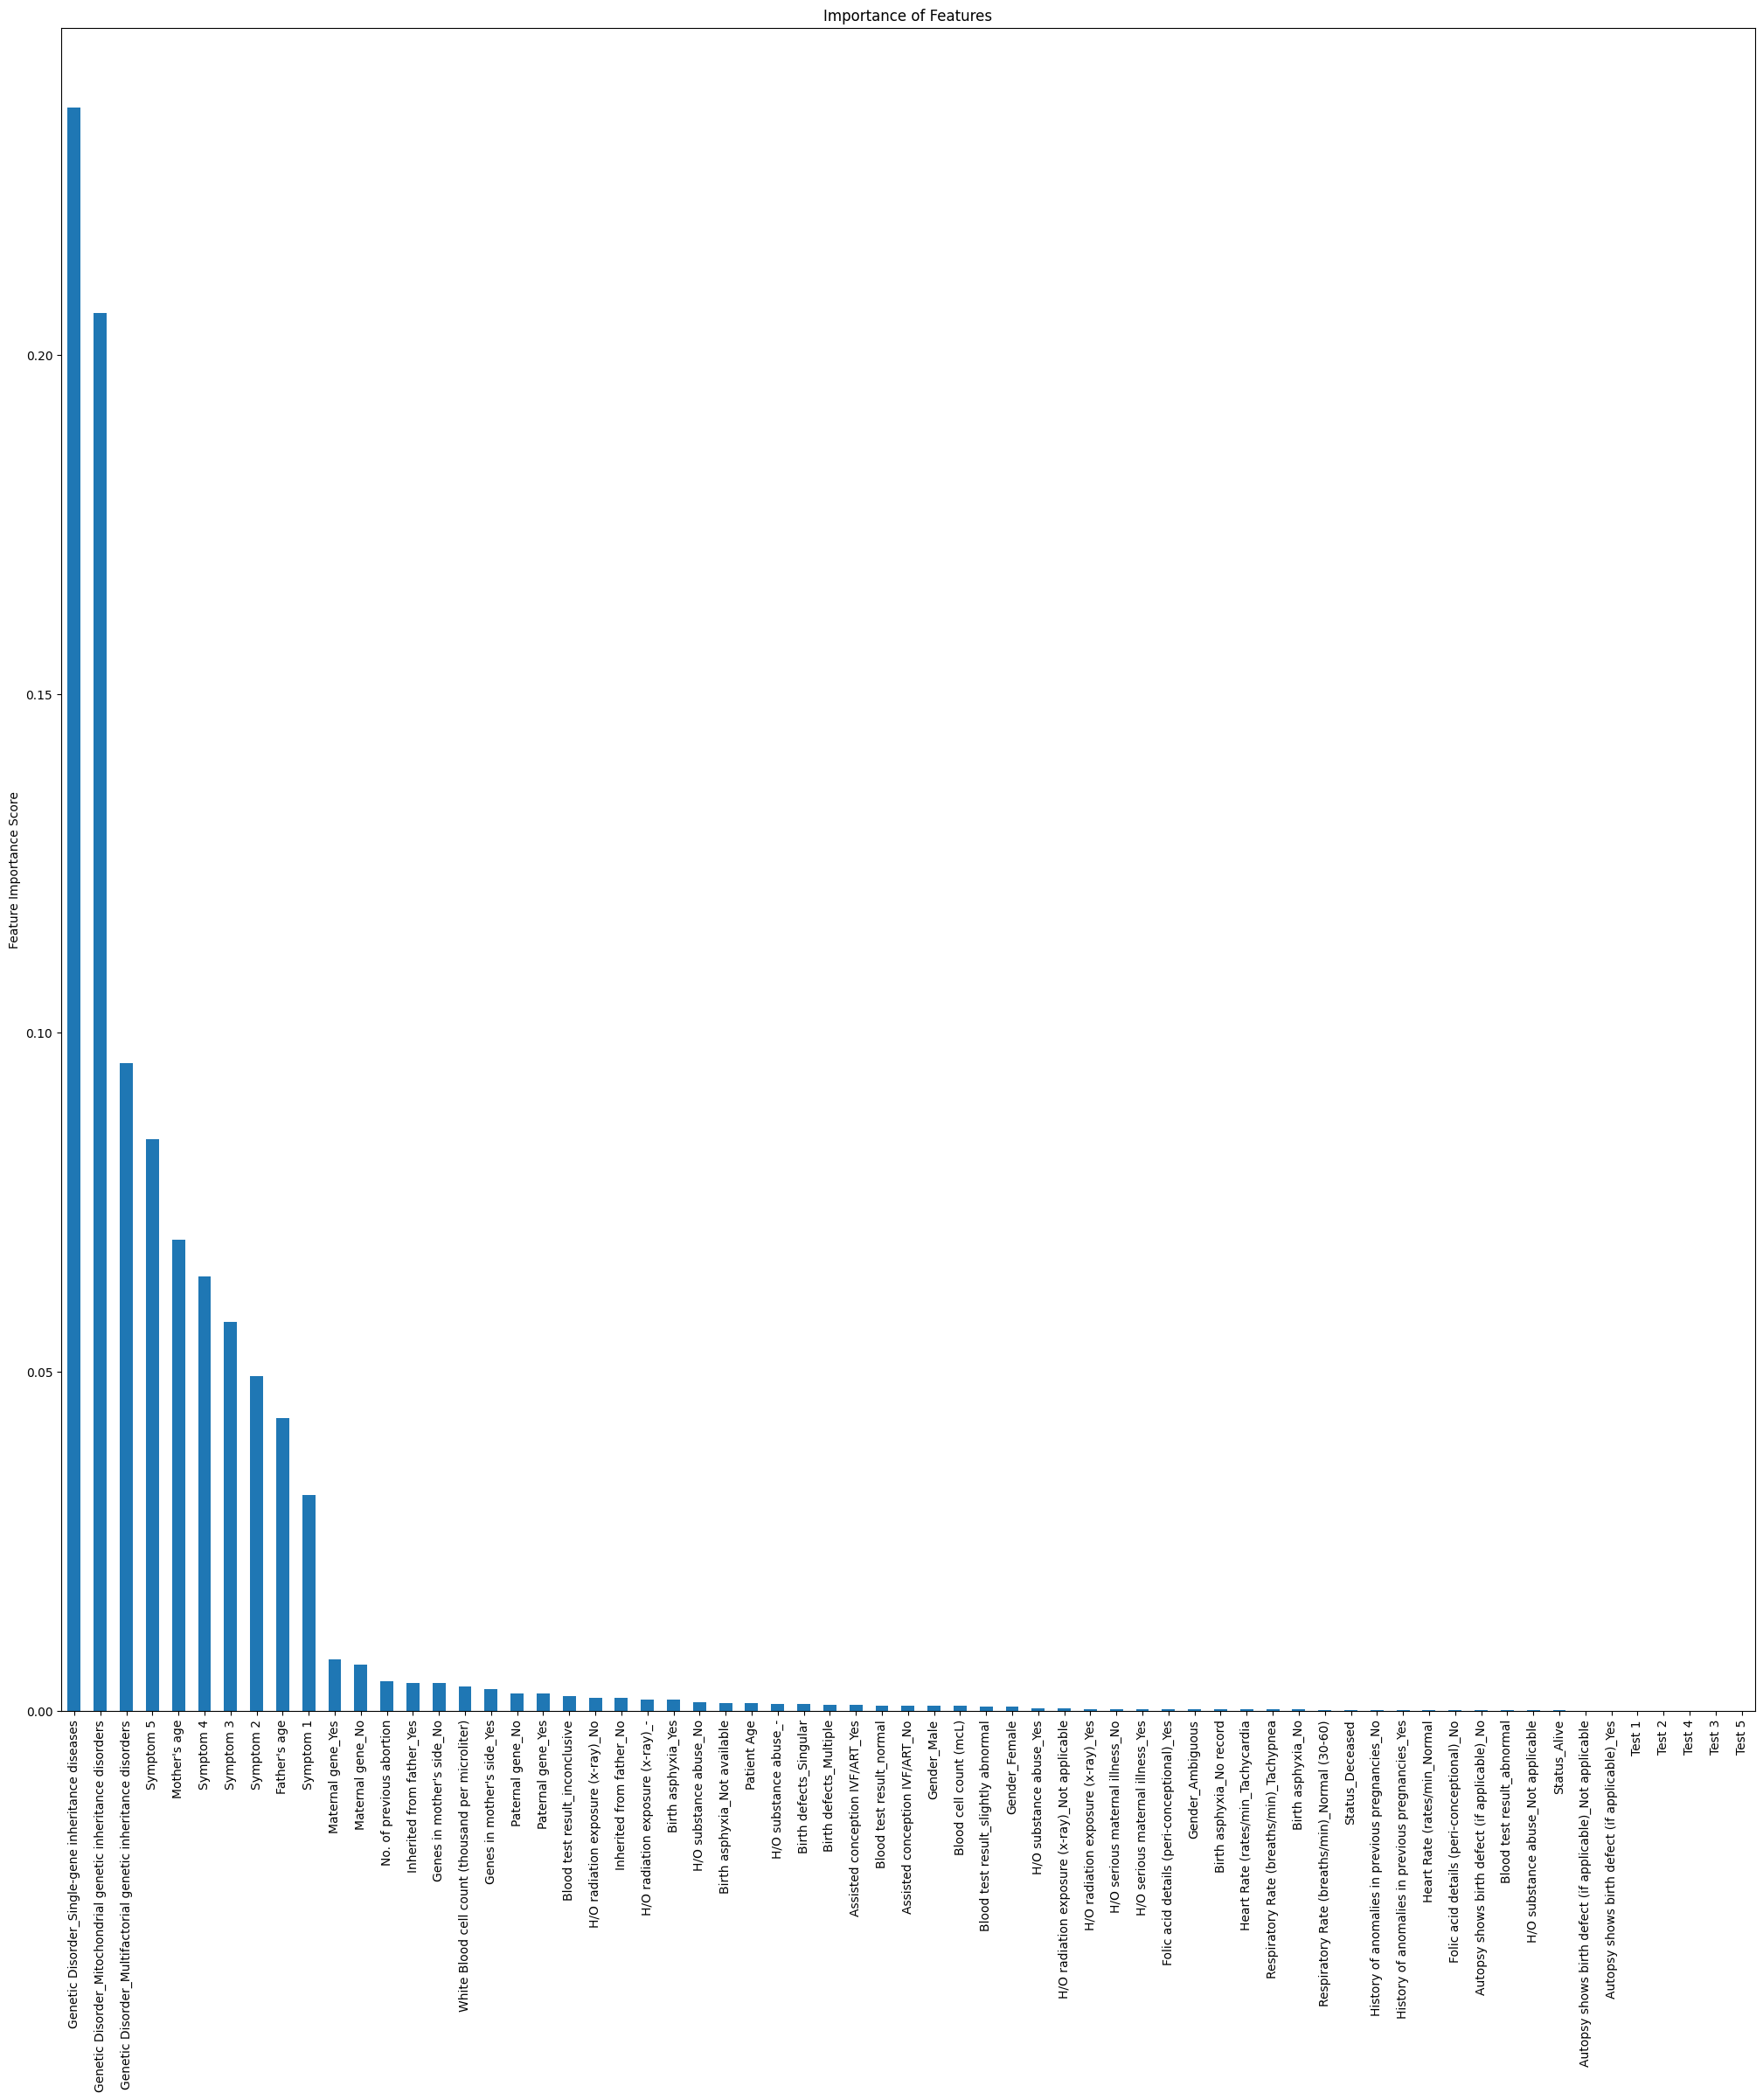

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
fig = plt.figure(figsize=(25,25))
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(X_test, y_test)))
pred=baseline.predict(X_test)
print(classification_report(y_test ,pred))


### Run a baseline GradientBoostingClassifier model with hyperparameter tuning

In [77]:
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test3, scoring='accuracy',n_jobs=4, cv=3)
tuning.fit(X_train,y_train)
tuning.cv_results_, tuning.best_params_, tuning.best_score_


({'mean_fit_time': array([ 10.62784576,  25.5555656 ,  47.45421815,  67.84053826,
          90.44267662, 108.41375327, 125.50111016,  11.18047595,
          28.36521427,  53.15341433,  78.45282865, 101.79594429,
         122.48332206, 139.93045195,  11.84179219,  28.39180533,
          56.86012634,  85.12541477, 108.05646531, 133.36030968,
         160.64823842,  11.2558825 ,  29.34541003,  58.78157234,
          85.00167465, 113.61962875, 143.51913818, 171.50992902,
          11.20842918,  27.94453518,  58.60507345,  83.68120615,
         113.20752756, 142.91876984, 171.21583923,  11.87667171,
          27.881972  ,  56.00417105,  84.94406835, 114.02615587,
         141.40753619, 160.01790476]),
  'std_fit_time': array([ 0.04574524,  0.29533636,  0.13898344,  1.38962242,  1.07625495,
          1.2956455 ,  0.82912343,  0.10094699,  0.8768147 ,  0.86906366,
          1.93966397,  1.22679885,  0.69408128,  1.212487  ,  0.80151756,
          0.23040867,  1.16093685,  0.24543157,  0.42543

### Tuning Max Depth

In [78]:
p_test2 = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.01,n_estimators=1500, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test2, scoring='accuracy',n_jobs=4,cv=3)
tuning.fit(X_train,y_train)
tuning.cv_results_, tuning.best_params_, tuning.best_score_


({'mean_fit_time': array([ 92.95292131, 128.42874495, 171.33898226, 235.27484377,
         331.40633337, 386.79146957]),
  'std_fit_time': array([ 0.07037907,  0.31178278,  0.51137168,  2.58323132,  1.29069962,
         40.84545001]),
  'mean_score_time': array([1.18432816, 1.20789107, 1.67072241, 2.30354579, 2.63270219,
         1.91749843]),
  'std_score_time': array([0.01889752, 0.10835117, 0.13138221, 0.37322679, 0.10820909,
         0.3831317 ]),
  'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 7],
               mask=[False, False, False, False, False, False],
         fill_value=999999),
  'params': [{'max_depth': 2},
   {'max_depth': 3},
   {'max_depth': 4},
   {'max_depth': 5},
   {'max_depth': 6},
   {'max_depth': 7}],
  'split0_test_score': array([0.88174743, 0.8857645 , 0.88701983, 0.8835049 , 0.87848356,
         0.87747929]),
  'split1_test_score': array([0.88400703, 0.89254331, 0.89204117, 0.8887773 , 0.8872709 ,
         0.88400703]),
  'split2_test_score': array(

## First evaluation of new model

Accuracy of the GBM on test set: 0.889
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       690
         1.0       0.95      0.89      0.92       114
         2.0       0.95      1.00      0.98       352
         3.0       0.85      0.87      0.86      1030
         4.0       1.00      1.00      1.00        17
         5.0       0.85      0.94      0.89       561
         6.0       0.90      0.69      0.78       276
         7.0       0.86      0.83      0.85       912
         8.0       1.00      0.45      0.62        31

    accuracy                           0.89      3983
   macro avg       0.93      0.85      0.88      3983
weighted avg       0.89      0.89      0.89      3983



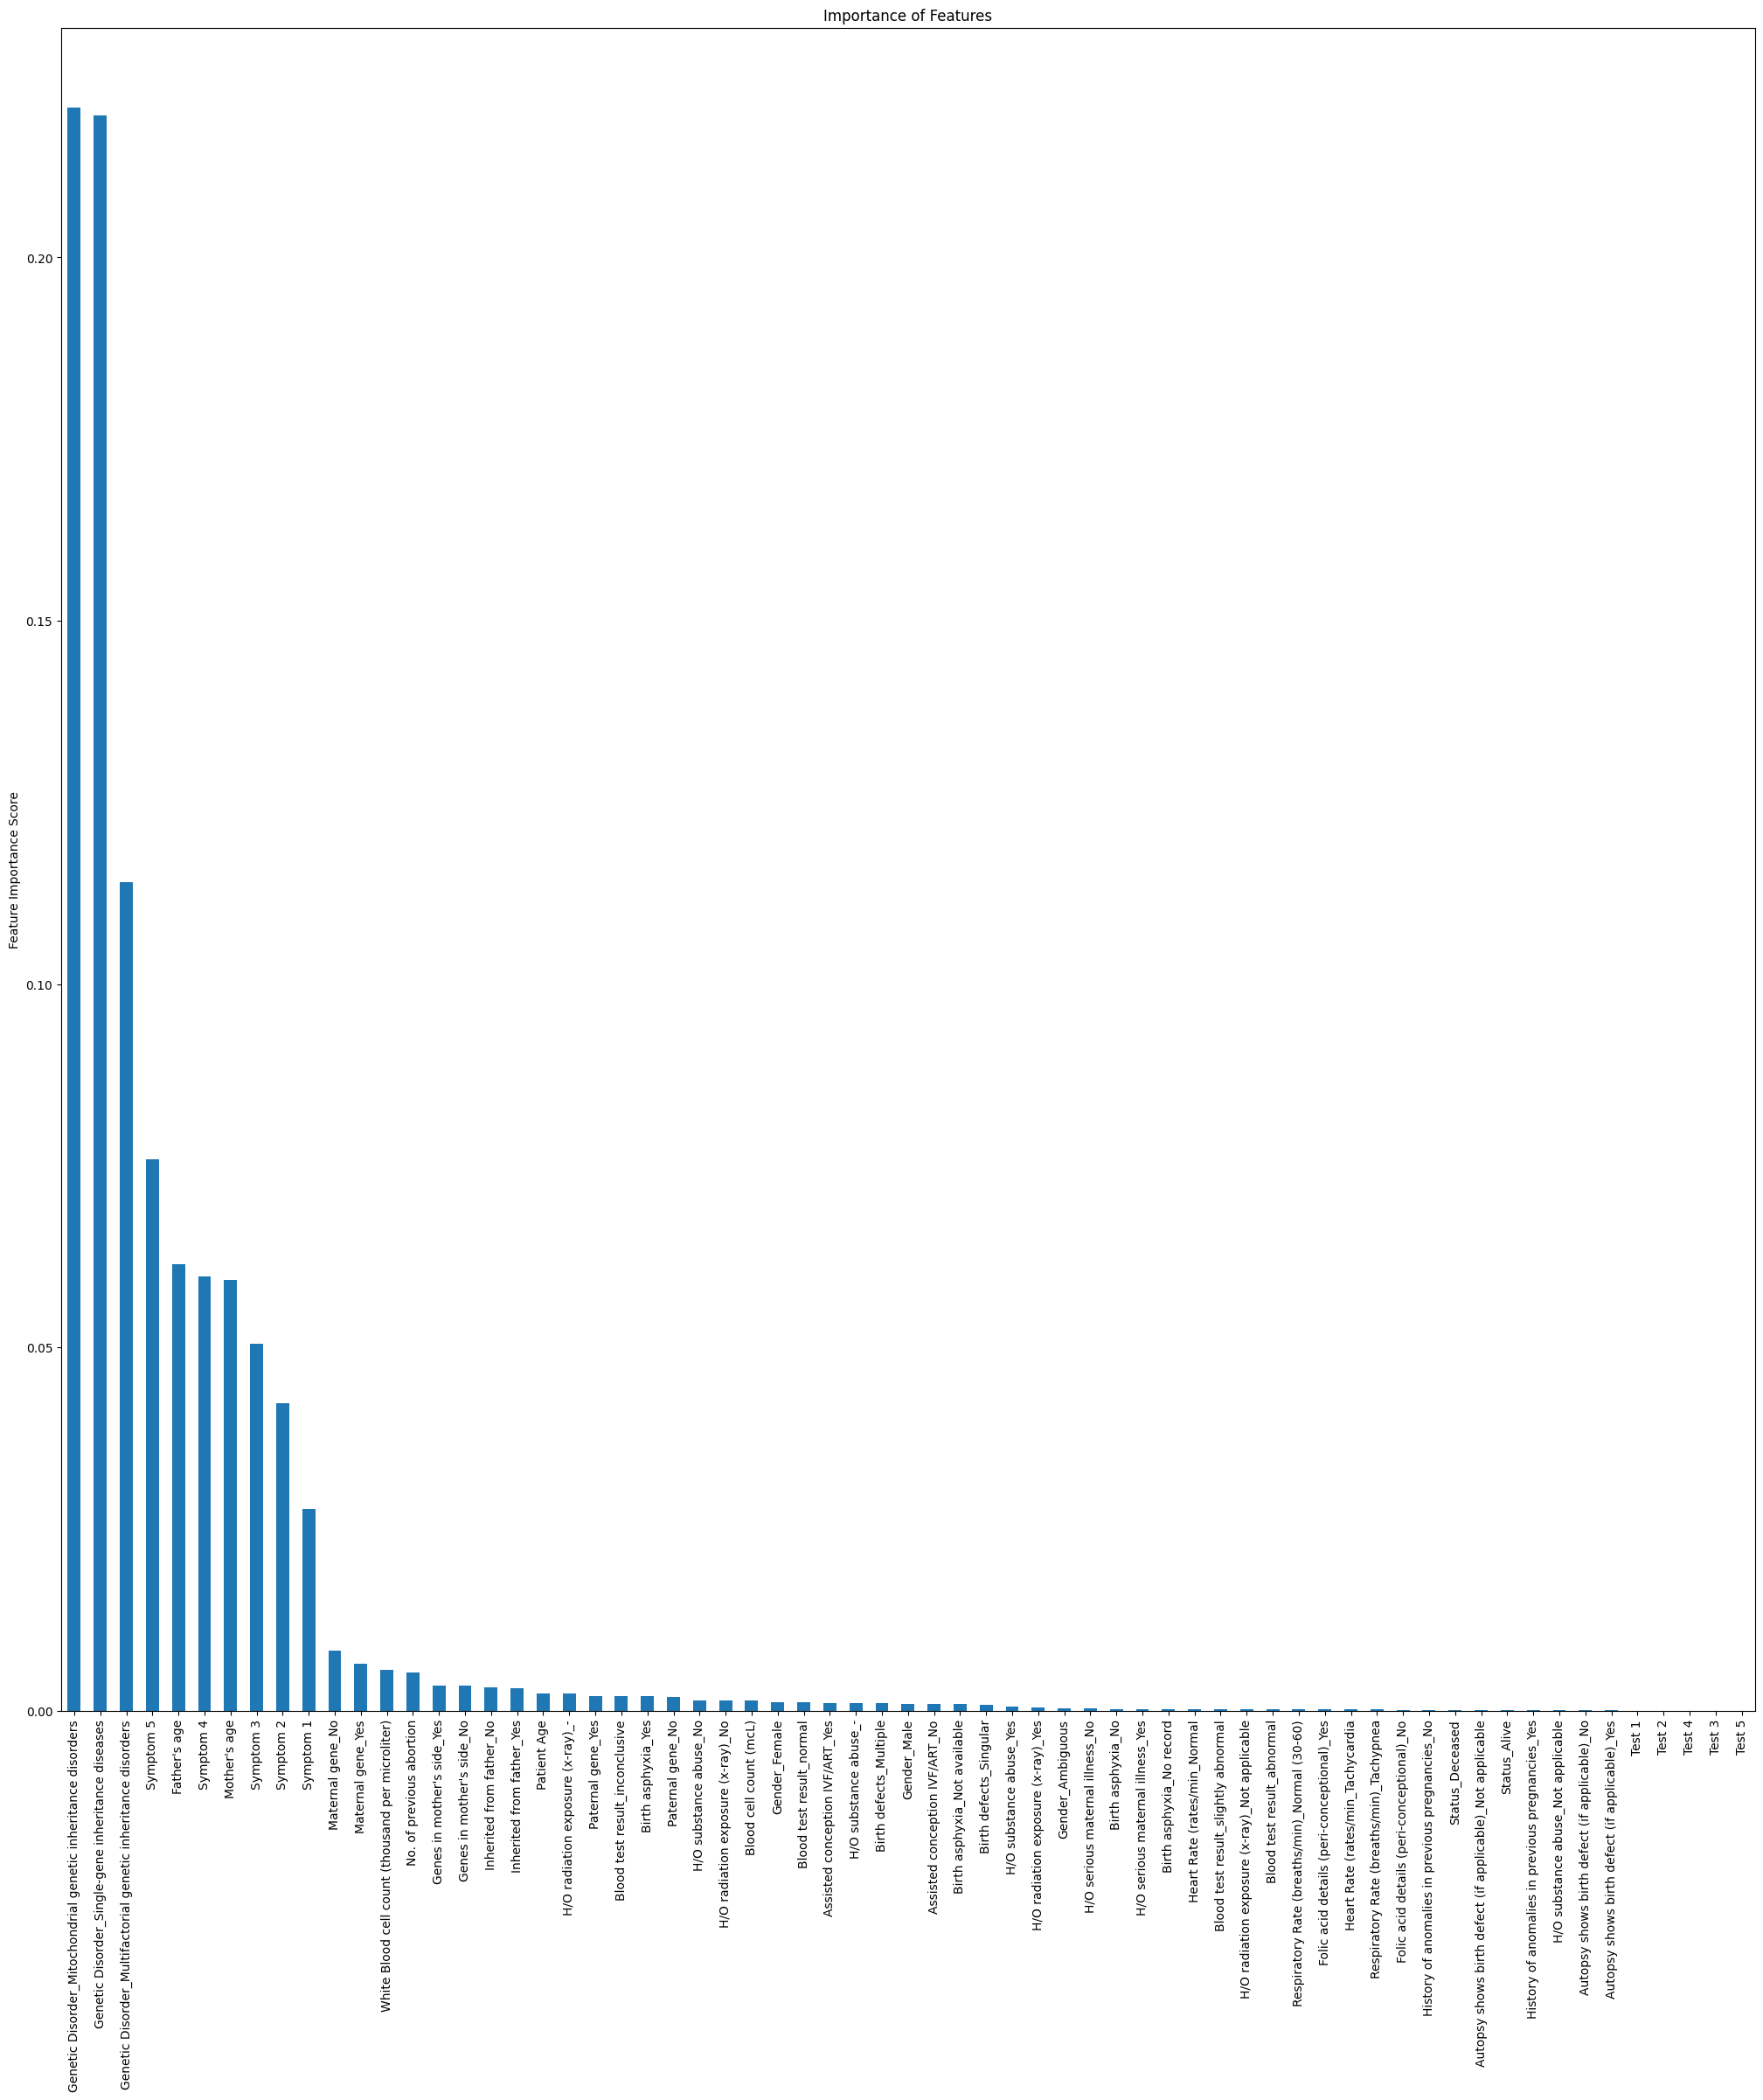

In [79]:
import matplotlib.pyplot as plt
model1 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
model1.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(model1.feature_importances_, predictors).sort_values(ascending=False)
fig = plt.figure(figsize=(25,25))
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(model1.score(X_test, y_test)))
pred=model1.predict(X_test)
print(classification_report(y_test, pred))

## Gradient Boosting Classifier with Cross Validation (k=10)

In [80]:
model = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
kfold = model_selection.KFold(n_splits=10)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 88.98% (0.53%)


## Ensemble Model with Cross Validation

In [81]:
from sklearn.ensemble import VotingClassifier
kfold = model_selection.KFold(n_splits=10)

model_1 = LogisticRegression(solver="newton-cg")
model_2 = XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, 
                        learning_rate = 0.3,max_depth = 5, alpha = 10, n_estimators = 10)
model_3 = RandomForestClassifier(n_estimators = 100, criterion = 'gini', bootstrap=False, random_state = 42)
model_4 = GradientBoostingClassifier(verbose=False,learning_rate = 0.15, random_state=35)
model_5 = SVC(kernel='linear', C=1)
model_6 = DecisionTreeClassifier(criterion = "gini", random_state = 1300, max_depth=1500, min_samples_leaf=5)
model_7 = MLPClassifier(hidden_layer_sizes=(20, 12, 20, 15), activation='tanh', solver='adam', 
                    alpha=0.0001, learning_rate='adaptive', 
                    learning_rate_init=0.0001, power_t=0.5, max_iter=1500, shuffle=True, 
                    random_state=None, verbose=False, warm_start=False, 
                    momentum=0.9, early_stopping=False, 
                    validation_fraction=0.1, epsilon=1e-08, 
                    n_iter_no_change=10, max_fun=2000)

final_model = VotingClassifier(
    estimators=[ ('lr', model_1),('xgb', model_2),('rf', model_3), ('gb', model_4),('svm', model_5),
                ('cart', model_6),('gnb', model_7)])
 
# training all the model on the train dataset
final_model.fit(X_train, y_train)
 
# predicting the output on the test dataset
pred_final = final_model.predict(X_val)

score = final_model.score(X_val, y_val)
print('Accuracy Score: ', score)

classification_report(y_val, pred_final)
print(classification_report)

accuracy = accuracy_score(y_val, pred_final)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

results = model_selection.cross_val_score(final_model, X_train, y_train, cv=kfold)
print(results.mean())

### Tuning n_estimators and Learning rate

Accuracy Score:  0.8661812703991966
<function classification_report at 0x000001CD7FEBA8C0>
Accuracy: 86.62%
0.8624147235480051


## Ensemble Model with Hyperparameter Tuning

In [82]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

model_1 = LogisticRegression(solver="newton-cg")
model_2 = XGBClassifier(learning_rate=0.3, booster='gbtree')
model_3 = RandomForestClassifier(n_estimators = 100, criterion = 'gini', bootstrap=False, random_state = 42)
model_4 = GradientBoostingClassifier(verbose=False,learning_rate = 0.15)
model_6 = DecisionTreeClassifier(random_state=42,criterion="gini",splitter="best")
model_5 = SVC(kernel='linear', C=1)
model_7 = MLPClassifier(hidden_layer_sizes=(10,30,10), activation='relu', solver='adam', 
                    alpha=0.0001, learning_rate='adaptive', 
                    learning_rate_init=0.0001, power_t=0.5, max_iter=1500, shuffle=True, 
                    random_state=None, verbose=False, warm_start=False, 
                    momentum=0.9, early_stopping=False, 
                    validation_fraction=0.1, epsilon=1e-08, 
                    n_iter_no_change=10, max_fun=2000)

vc = VotingClassifier(
    estimators=[('lr', model_1), ('xgb', model_2), ('rf', model_3), ('gb', model_4),('svm', model_5),
                ('cart', model_6),('gnb', model_7)])

cvm = cross_val_score(vc, X_train, y_train)
base_score = cvm.mean()
base_std = cvm.std()
print('\n')
print(f'The average base cross-validation score is {round(base_score,4)} (+- {round(base_std,4)})')

params = {'voting':['hard', 'soft'],
          'weights':[(1,1,1,1,1,1,1), (2,1,1,1,1,2,1), 
                     (1,2,1,1,1,1,2), (1,1,2,1,1,1,2),
                     (1,1,1,2,1,2,1), (1,1,1,1,2,1,1), 
                     (1,1,1,2,2,1,1), (2,1,1,1,2,1,2)]}

#fit gridsearch & print best params
grid = GridSearchCV(vc, params)
grid.fit(X_train, y_train)
print('\n')
print(f'The best params is : {grid.best_params_}')

#print the final cv score
tuned_vc = VotingClassifier([('lr', model_1), ('xgb', model_2), ('rf', model_3), ('gb', model_4),('svm', model_5),
                             ('cart', model_6),('gnb', model_7)], 
                             **grid.best_params_, n_jobs = -1)
tuned_cvm = cross_val_score(tuned_vc, X_train, y_train)
tuned_score = tuned_cvm.mean()
tuned_std = tuned_cvm.std()
print('\n')
print(f'The average tuned cross-validation score is {round(tuned_score, 4)} (+- {round(tuned_std, 4)})')




The average base cross-validation score is 0.8601 (+- 0.0053)


The best params is : {'voting': 'hard', 'weights': (1, 1, 1, 2, 1, 2, 1)}


The average tuned cross-validation score is 0.8704 (+- 0.0049)


# Predicting for test data

In [83]:
# Converting Categorical Data using One Hot Encoding
catecols=["Genes in mother's side", "Inherited from father", 'Maternal gene',
       'Paternal gene','Respiratory Rate (breaths/min)','Heart Rate (rates/min','Birth asphyxia',
       'Autopsy shows birth defect (if applicable)','Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)', 'H/O substance abuse','Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies','Birth defects','Blood test result','Status','Gender']

one_hot_encoded_data = pd.get_dummies(df_test, columns = catecols)

df_test=one_hot_encoded_data
df_test = df_test.apply(pd.to_numeric,downcast="float")
df_test

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,Test 4,Test 5,No. of previous abortion,...,Blood test result_abnormal,Blood test result_inconclusive,Blood test result_normal,Blood test result_slightly abnormal,Status_Alive,Status_Deceased,Gender_-99,Gender_Ambiguous,Gender_Female,Gender_Male
0,6.0,4.981655,38.0,61.0,0.0,-99.0,0.0,1.0,0.0,2.0,...,False,False,False,True,True,False,False,False,False,True
1,10.0,5.118889,33.0,53.0,0.0,0.0,-99.0,1.0,-99.0,-99.0,...,False,False,True,False,True,False,False,False,False,True
2,5.0,4.876204,48.0,60.0,0.0,0.0,0.0,1.0,0.0,0.0,...,False,False,False,True,False,True,False,True,False,False
3,13.0,4.687767,25.0,55.0,0.0,0.0,0.0,1.0,0.0,-99.0,...,False,False,True,False,True,False,False,True,False,False
4,5.0,5.152362,41.0,38.0,0.0,0.0,0.0,1.0,0.0,-99.0,...,False,False,True,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,9.0,4.878335,28.0,63.0,-99.0,0.0,-99.0,1.0,-99.0,2.0,...,True,False,False,False,True,False,True,False,False,False
9461,1.0,4.927151,37.0,62.0,0.0,0.0,-99.0,1.0,-99.0,-99.0,...,True,False,False,False,False,True,False,False,False,True
9462,2.0,4.898352,24.0,32.0,-99.0,0.0,0.0,1.0,0.0,3.0,...,False,False,True,False,False,True,False,False,True,False
9463,13.0,4.804840,36.0,56.0,0.0,0.0,0.0,1.0,0.0,1.0,...,False,True,False,False,True,False,True,False,False,False


In [84]:
df_test["sum of Mother's and fathers age avg"]=(df_test["Mother's age"]+df_test["Father's age"]) / 2
df_test["total symptom"]=(df_test["Symptom 1"]+df_test["Symptom 2"]+df_test["Symptom 3"]+df_test["Symptom 4"]+df_test["Symptom 5"]) / 5
df_test["total test"]=(df_test["Test 1"]+df_test["Test 2"]+df_test["Test 3"]+df_test["Test 4"]+df_test["Test 5"])/5

## Normalizing the Test Data

In [85]:
sc = MinMaxScaler()
testscaler = sc.fit_transform(df_test[cols_names]) 
df_test[cols_names]=testscaler

In [86]:
df_test

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,Test 4,Test 5,No. of previous abortion,...,Blood test result_slightly abnormal,Status_Alive,Status_Deceased,Gender_-99,Gender_Ambiguous,Gender_Female,Gender_Male,sum of Mother's and fathers age avg,total symptom,total test
0,6.0,0.553563,38.0,61.0,0.0,-99.0,0.0,1.0,0.0,0.980583,...,True,True,False,False,False,False,True,49.5,0.2,-19.600000
1,10.0,0.641776,33.0,53.0,0.0,0.0,-99.0,1.0,-99.0,0.000000,...,False,True,False,False,False,False,True,43.0,0.2,-39.400002
2,5.0,0.485780,48.0,60.0,0.0,0.0,0.0,1.0,0.0,0.961165,...,True,False,True,False,True,False,False,54.0,0.2,0.200000
3,13.0,0.364654,25.0,55.0,0.0,0.0,0.0,1.0,0.0,0.000000,...,False,True,False,False,True,False,False,40.0,0.2,0.200000
4,5.0,0.663292,41.0,38.0,0.0,0.0,0.0,1.0,0.0,0.000000,...,False,False,True,False,True,False,False,39.5,0.2,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,9.0,0.487149,28.0,63.0,-99.0,0.0,-99.0,1.0,-99.0,0.980583,...,False,True,False,True,False,False,False,45.5,0.2,-59.200001
9461,1.0,0.518528,37.0,62.0,0.0,0.0,-99.0,1.0,-99.0,0.000000,...,False,False,True,False,False,False,True,49.5,0.2,-39.400002
9462,2.0,0.500016,24.0,32.0,-99.0,0.0,0.0,1.0,0.0,0.990291,...,False,False,True,False,False,True,False,28.0,0.2,-19.600000
9463,13.0,0.439907,36.0,56.0,0.0,0.0,0.0,1.0,0.0,0.970874,...,False,True,False,True,False,False,False,46.0,0.2,0.200000


## Getting the corresponding Disorder subclass of the prediction

In [87]:
d1={}
d1[0]="Cystic fibrosis"
d1[1]="Leber's hereditary optic neuropathy"
d1[2]="Diabetes"
d1[3]="Leigh syndrome"
d1[4]="Cancer"
d1[5]="Tay-Sachs"
d1[6]="Hemochromatosis"
d1[7]="Mitochondrial myopathy"
d1[8]="Alzheimer's"

### Gradient Boosting Classifier with the best hyperparameters obtained after tuning

In [88]:
from sklearn.ensemble import GradientBoostingClassifier
# Train
gbct_m = GradientBoostingClassifier(
    verbose=False,
    learning_rate=0.15,
    random_state=35
).fit(X_train, y_train)

# FIX: align test features with training features
df_test = df_test.reindex(columns=X_train.columns, fill_value=0)

# Predict
predict = gbct_m.predict(df_test)


In [89]:
predict

array([3., 3., 3., ..., 3., 3., 7.], shape=(9465,), dtype=float32)

In [90]:
# 1. Make sure predictions are integers
predict = predict.astype(int)

# 2. Map predicted class → Disorder Subclass (row-wise)
df_test['Disorder Subclass'] = pd.Series(predict, index=df_test.index).map(d1)

# 3. Map Disorder Subclass → Genetic Disorder (parent class)
df_test['Genetic Disorder'] = df_test['Disorder Subclass'].map(d)


In [91]:
df_test

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,Test 4,Test 5,No. of previous abortion,...,Blood test result_inconclusive,Blood test result_normal,Blood test result_slightly abnormal,Status_Alive,Status_Deceased,Gender_Ambiguous,Gender_Female,Gender_Male,Disorder Subclass,Genetic Disorder
0,6.0,0.553563,38.0,61.0,0.0,-99.0,0.0,1.0,0.0,0.980583,...,False,False,True,True,False,False,False,True,Leigh syndrome,Mitochondrial genetic inheritance disorders
1,10.0,0.641776,33.0,53.0,0.0,0.0,-99.0,1.0,-99.0,0.000000,...,False,True,False,True,False,False,False,True,Leigh syndrome,Mitochondrial genetic inheritance disorders
2,5.0,0.485780,48.0,60.0,0.0,0.0,0.0,1.0,0.0,0.961165,...,False,False,True,False,True,True,False,False,Leigh syndrome,Mitochondrial genetic inheritance disorders
3,13.0,0.364654,25.0,55.0,0.0,0.0,0.0,1.0,0.0,0.000000,...,False,True,False,True,False,True,False,False,Leigh syndrome,Mitochondrial genetic inheritance disorders
4,5.0,0.663292,41.0,38.0,0.0,0.0,0.0,1.0,0.0,0.000000,...,False,True,False,False,True,True,False,False,Leigh syndrome,Mitochondrial genetic inheritance disorders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,9.0,0.487149,28.0,63.0,-99.0,0.0,-99.0,1.0,-99.0,0.980583,...,False,False,False,True,False,False,False,False,Leigh syndrome,Mitochondrial genetic inheritance disorders
9461,1.0,0.518528,37.0,62.0,0.0,0.0,-99.0,1.0,-99.0,0.000000,...,False,False,False,False,True,False,False,True,Leigh syndrome,Mitochondrial genetic inheritance disorders
9462,2.0,0.500016,24.0,32.0,-99.0,0.0,0.0,1.0,0.0,0.990291,...,False,True,False,False,True,False,True,False,Leigh syndrome,Mitochondrial genetic inheritance disorders
9463,13.0,0.439907,36.0,56.0,0.0,0.0,0.0,1.0,0.0,0.970874,...,True,False,False,True,False,False,False,False,Leigh syndrome,Mitochondrial genetic inheritance disorders


In [92]:
df_test[['Disorder Subclass', 'Genetic Disorder']].head()


,Disorder Subclass,Genetic Disorder
0,Leigh syndrome,Mitochondrial genetic inheritance disorders
1,Leigh syndrome,Mitochondrial genetic inheritance disorders
2,Leigh syndrome,Mitochondrial genetic inheritance disorders
3,Leigh syndrome,Mitochondrial genetic inheritance disorders
4,Leigh syndrome,Mitochondrial genetic inheritance disorders


In [93]:
df_test['Disorder Subclass'].value_counts()

Disorder Subclass
Leigh syndrome            7473
Mitochondrial myopathy    1981
Tay-Sachs                    6
Hemochromatosis              5
Name: count, dtype: int64

In [94]:
df_test['Genetic Disorder'].value_counts()


Genetic Disorder
Mitochondrial genetic inheritance disorders    9454
Single-gene inheritance diseases                 11
Name: count, dtype: int64

In [95]:
df_test[['Disorder Subclass', 'Genetic Disorder']].sample(10)

,Disorder Subclass,Genetic Disorder
5463,Leigh syndrome,Mitochondrial genetic inheritance disorders
275,Mitochondrial myopathy,Mitochondrial genetic inheritance disorders
1102,Mitochondrial myopathy,Mitochondrial genetic inheritance disorders
3868,Leigh syndrome,Mitochondrial genetic inheritance disorders
8081,Mitochondrial myopathy,Mitochondrial genetic inheritance disorders
1476,Leigh syndrome,Mitochondrial genetic inheritance disorders
5551,Leigh syndrome,Mitochondrial genetic inheritance disorders
3910,Leigh syndrome,Mitochondrial genetic inheritance disorders
7065,Leigh syndrome,Mitochondrial genetic inheritance disorders
468,Leigh syndrome,Mitochondrial genetic inheritance disorders


In [96]:
# Use ONLY the features seen during training
X_test = df_test[X_train.columns]
# Get probabilities
proba = gbct_m.predict_proba(X_test)
# Add confidence to df_test
df_test['Prediction Confidence'] = proba.max(axis=1)

In [97]:
df_test[['Disorder Subclass', 'Genetic Disorder', 'Prediction Confidence']].head()

,Disorder Subclass,Genetic Disorder,Prediction Confidence
0,Leigh syndrome,Mitochondrial genetic inheritance disorders,0.784176
1,Leigh syndrome,Mitochondrial genetic inheritance disorders,0.715017
2,Leigh syndrome,Mitochondrial genetic inheritance disorders,0.384051
3,Leigh syndrome,Mitochondrial genetic inheritance disorders,0.581596
4,Leigh syndrome,Mitochondrial genetic inheritance disorders,0.711613


In [98]:
final_result = df_test[[
    'Patient Age',
    'Disorder Subclass',
    'Genetic Disorder',
    'Prediction Confidence'
]]

In [99]:
final_result

,Patient Age,Disorder Subclass,Genetic Disorder,Prediction Confidence
0,6.0,Leigh syndrome,Mitochondrial genetic inheritance disorders,0.784176
1,10.0,Leigh syndrome,Mitochondrial genetic inheritance disorders,0.715017
2,5.0,Leigh syndrome,Mitochondrial genetic inheritance disorders,0.384051
3,13.0,Leigh syndrome,Mitochondrial genetic inheritance disorders,0.581596
4,5.0,Leigh syndrome,Mitochondrial genetic inheritance disorders,0.711613
...,...,...,...,...
9460,9.0,Leigh syndrome,Mitochondrial genetic inheritance disorders,0.754875
9461,1.0,Leigh syndrome,Mitochondrial genetic inheritance disorders,0.438802
9462,2.0,Leigh syndrome,Mitochondrial genetic inheritance disorders,0.486967
9463,13.0,Leigh syndrome,Mitochondrial genetic inheritance disorders,0.684066


## saving the output in csv

In [100]:
final_result.to_csv("final_genetic_disorder_predictions.csv", index=False)

In [101]:
final_result['Disorder Subclass'].value_counts()

Disorder Subclass
Leigh syndrome            7473
Mitochondrial myopathy    1981
Tay-Sachs                    6
Hemochromatosis              5
Name: count, dtype: int64

In [123]:
cleaned = []
for col in catecols:
    if 'Heart Rate' in col:
        cleaned.append('Heart Rate (rates/min)')
    else:
        cleaned.append(col)

catecols = list(dict.fromkeys(cleaned))  # remove duplicates safely


In [125]:
for col in catecols:
    if col not in input_df.columns:
        input_df[col] = 'Unknown'


In [126]:
input_df = pd.get_dummies(input_df, columns=catecols)

In [107]:
# Predict on the validation set from df_train
y_val_pred = gbct_m.predict(X_val)
y_val_pred = y_val_pred.astype(int)

# Check the distribution of predictions on the validation set
pred_dist_val = pd.Series(y_val_pred).value_counts().sort_index()
true_dist_val = y_val.value_counts().sort_index()

print("True class distribution in validation set:")
print(true_dist_val)

print("\nPredicted class distribution on validation set:")
print(pred_dist_val)


True class distribution in validation set:
Disorder Subclass
0.0     720
1.0     127
2.0     337
3.0    1036
4.0      23
5.0     550
6.0     271
7.0     888
8.0      31
Name: count, dtype: int64

Predicted class distribution on validation set:
0     724
1     124
2     376
3    1076
5     605
6     212
7     851
8      15
Name: count, dtype: int64


In [108]:
y_val_pred = gbct_m.predict(X_val).astype(int)

In [109]:
df_val = X_val.copy()

df_val['True Class'] = y_val.values
df_val['Predicted Class'] = y_val_pred


In [110]:
df_val['True Disorder Subclass'] = df_val['True Class'].map(d1)
df_val['Predicted Disorder Subclass'] = df_val['Predicted Class'].map(d1)


In [111]:
df_val['True Genetic Disorder'] = df_val['True Disorder Subclass'].map(d)
df_val['Predicted Genetic Disorder'] = df_val['Predicted Disorder Subclass'].map(d)


In [112]:
df_val[
    [
        'True Disorder Subclass',
        'Predicted Disorder Subclass',
        'True Genetic Disorder',
        'Predicted Genetic Disorder'
    ]
].head(10)


,True Disorder Subclass,Predicted Disorder Subclass,True Genetic Disorder,Predicted Genetic Disorder
11445,Tay-Sachs,Tay-Sachs,Single-gene inheritance diseases,Single-gene inheritance diseases
13467,Cystic fibrosis,Cystic fibrosis,Single-gene inheritance diseases,Single-gene inheritance diseases
13424,Tay-Sachs,Tay-Sachs,Single-gene inheritance diseases,Single-gene inheritance diseases
18009,Leigh syndrome,Leigh syndrome,Mitochondrial genetic inheritance disorders,Mitochondrial genetic inheritance disorders
13318,Mitochondrial myopathy,Mitochondrial myopathy,Mitochondrial genetic inheritance disorders,Mitochondrial genetic inheritance disorders
5518,Diabetes,Diabetes,Multifactorial genetic inheritance disorders,Multifactorial genetic inheritance disorders
8238,Cystic fibrosis,Cystic fibrosis,Single-gene inheritance diseases,Single-gene inheritance diseases
6951,Leber's hereditary optic neuropathy,Leber's hereditary optic neuropathy,Mitochondrial genetic inheritance disorders,Mitochondrial genetic inheritance disorders
16657,Cystic fibrosis,Cystic fibrosis,Single-gene inheritance diseases,Single-gene inheritance diseases
21664,Mitochondrial myopathy,Leigh syndrome,Mitochondrial genetic inheritance disorders,Mitochondrial genetic inheritance disorders


In [113]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_val_pred))


              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       720
         1.0       0.95      0.93      0.94       127
         2.0       0.89      1.00      0.94       337
         3.0       0.85      0.88      0.86      1036
         4.0       0.00      0.00      0.00        23
         5.0       0.84      0.93      0.88       550
         6.0       0.86      0.68      0.76       271
         7.0       0.86      0.83      0.84       888
         8.0       0.93      0.45      0.61        31

    accuracy                           0.88      3983
   macro avg       0.80      0.74      0.76      3983
weighted avg       0.88      0.88      0.88      3983



In [115]:
df_val.to_csv("validation_predictions.csv", index=False)

In [131]:
import numpy as np
import pandas as pd

# ------------------------------------------------------------
# 0. FIX catecols (REMOVE ALL HEART RATE TYPOS)
# ------------------------------------------------------------
cleaned = []
for col in catecols:
    if 'Heart Rate' in col:
        cleaned.append('Heart Rate (rates/min)')
    else:
        cleaned.append(col)
catecols = list(dict.fromkeys(cleaned))  # remove duplicates safely

# ------------------------------------------------------------
# 1. MANUAL INPUT (COLUMN NAME FIXED)
# ------------------------------------------------------------
manual_input = {
    'Patient Age': 0.0,
    "Genes in mother's side": 'Yes',
    'Inherited from father': 'No',
    'Maternal gene': 'No',
    'Paternal gene': 'Yes',

    'Blood cell count (mcL)': 4.807778109357083,
    "Mother's age": 28.0,
    "Father's age": 0.0,

    'Status': 'Deceased',
    'Respiratory Rate (breaths/min)': 'normal',
    'Heart Rate (rates/min)': 'normal',   # ✅ MUST BE EXACT

    'Test 1': 0.0,
    'Test 2': 0.0,
    'Test 3': 0.0,
    'Test 4': 1.0,
    'Test 5': 0.0,

    'Birth asphyxia': 'Yes',
    'Gender': 'Ambiguous',

    'Autopsy shows birth defect (if applicable)': 'Not available',
    'Folic acid details (peri-conceptional)': 'No',
    'H/O serious maternal illness': 'No',
    'H/O radiation exposure (x-ray)': 'No',
    'H/O substance abuse': 'No',

    'Assisted conception IVF/ART': 'No',
    'History of anomalies in previous pregnancies': 'No',

    'No. of previous abortion': 4.0,
    'Birth defects': 'Multiple',

    'White Blood cell count (thousand per microliter)': 8.4405926789641,
    'Blood test result': 'abnormal',

    'Symptom 1': 0.0,
    'Symptom 2': 1.0,
    'Symptom 3': 1.0,
    'Symptom 4': 0.0,
    'Symptom 5': 0.0
}

# ------------------------------------------------------------
# 2. CONVERT TO DATAFRAME
# ------------------------------------------------------------
input_df = pd.DataFrame([manual_input])

# ------------------------------------------------------------
# 3. FEATURE ENGINEERING (SAME AS TRAINING)
# ------------------------------------------------------------
input_df['Blood cell count (mcL)_log'] = np.log1p(
    input_df['Blood cell count (mcL)']
)

input_df["sum of Mother's and fathers age avg"] = (
    input_df["Mother's age"] + input_df["Father's age"]
) / 2

input_df["total symptom"] = (
    input_df["Symptom 1"] + input_df["Symptom 2"] +
    input_df["Symptom 3"] + input_df["Symptom 4"] +
    input_df["Symptom 5"]
) / 5

input_df["total test"] = (
    input_df["Test 1"] + input_df["Test 2"] +
    input_df["Test 3"] + input_df["Test 4"] +
    input_df["Test 5"]
) / 5

# ------------------------------------------------------------
# 4. ENSURE ALL CATEGORICAL COLUMNS EXIST (CRITICAL FIX)
# ------------------------------------------------------------
for col in catecols:
    if col not in input_df.columns:
        input_df[col] = 'Unknown'

# ------------------------------------------------------------
# 5. ONE-HOT ENCODING (NOW SAFE)
# ------------------------------------------------------------
input_df = pd.get_dummies(input_df, columns=catecols)

# ------------------------------------------------------------
# 6. ALIGN WITH TRAINING FEATURES
# ------------------------------------------------------------
input_df = input_df.reindex(columns=X_train.columns, fill_value=0)

# ------------------------------------------------------------
# 7. SCALE NUMERIC FEATURES
# ------------------------------------------------------------
input_df[cols_names] = sc.transform(input_df[cols_names])

# ------------------------------------------------------------
# 8. PREDICT
# ------------------------------------------------------------
pred = gbct_m.predict(input_df).astype(int)
proba = gbct_m.predict_proba(input_df)
confidence = float(proba.max(axis=1))

# ------------------------------------------------------------
# 9. CLASS LABEL MAP
# ------------------------------------------------------------
d1 = {
    0: "Cystic fibrosis",
    1: "Leber's hereditary optic neuropathy",
    2: "Diabetes",
    3: "Leigh syndrome",
    4: "Cancer",
    5: "Tay-Sachs",
    6: "Hemochromatosis",
    7: "Mitochondrial myopathy",
    8: "Alzheimer's"
}

# ------------------------------------------------------------
# 10. FINAL OUTPUT
# ------------------------------------------------------------
print("Predicted Disorder Subclass :", d1[pred[0]])

Predicted Disorder Subclass : Leigh syndrome


In [132]:
import pickle

label_map = {
    0: "Cystic fibrosis",
    1: "Leber's hereditary optic neuropathy",
    2: "Diabetes",
    3: "Leigh syndrome",
    4: "Cancer",
    5: "Tay-Sachs",
    6: "Hemochromatosis",
    7: "Mitochondrial myopathy",
    8: "Alzheimer's"
}

artifacts = {
    "model": gbct_m,
    "scaler": sc,
    "columns": X_train.columns,
    "catecols": catecols,
    "cols_names": cols_names,
    "label_map": label_map
}

with open("genetic_model.pkl", "wb") as f:
    pickle.dump(artifacts, f)

print("genetic_model.pkl saved successfully")


genetic_model.pkl saved successfully


In [133]:
with open("genetic_model.pkl", "rb") as f:
    test = pickle.load(f)

print(test.keys())


dict_keys(['model', 'scaler', 'columns', 'catecols', 'cols_names', 'label_map'])
